# Credit Risk Analysis, Classification and Clustering with German Credit Dataset

**Student Name Surname:** Ayşe Kaya

**Student Number:** 21011060

**Course:** Introduction to Data Mining

**Project Advisor:** Prof. Dr. Songül Varlı


## 1. Introduction

In this section, the general purpose of the project and the basic features of the dataset used will be introduced.

### 1.1. Purpose of the Project

The main purpose of this project is to focus on the assessment of credit risk, which is an important problem in the financial sector. This study, which will be conducted using the German Credit Data, aims to achieve the following objectives:

* **Comprehensive Data Analysis:** Detailed examination of the features in the data set, extraction of the meanings of the features, evaluation of data quality (missing data, outliers, etc.) and preliminary analysis of the potential effects of the features on the target variable (credit risk).

* **Development of Effective Classification Models:** Implementation of at least three different classification algorithms that can accurately predict the credit risk of customers (good or bad credit customers). The performances of these models will be compared considering the **cost matrix** specified in the project description, as well as standard metrics (accuracy, precision, sensitivity, F1 score, ROC AUC). The aim is to determine the best model, especially considering the high cost of classifying a customer labeled as "bad" as "good".
* **Creating Meaningful Customer Clusters:** Using at least three different clustering algorithms on the dataset, to reveal natural groupings and segments of customers. The characteristics of the resulting clusters will be examined, the differences between these clusters in terms of credit risk will be analyzed, and the clusters will be tried to be labeled meaningfully.

As a result of these studies, it is aimed to provide data-driven and cost-conscious approaches that can contribute to the evaluation processes of credit applications.

### 1.2. Introduction to the Dataset

The dataset to be used in this project is known as "German Credit Data". The dataset was provided by Prof. Dr. Hans Hofmann (Institute for Statistics and Econometrics, University of Hamburg) and is a widely used dataset in the UCI Machine Learning Repository.

* **Source:** Prof. Dr. Hans Hofmann, University of Hamburg.
* **Number of Samples:** Contains 1000 credit application samples.
* **Number of Features:** There are 20 features in the original `german.data` file. 7 of these features are numerical and 13 are categorical/symbolic (qualitative). This original dataset (`german.data`) will be used primarily within the scope of the project. In addition, there is a version with all features converted to numeric (`german.data-numeric` - 24 features) produced by the University of Strathclyde in line with the requirements of some algorithms and used in the StatLog project, but this project will primarily address the original categorical/numeric mixed structure.

* **Target Variable:** There is a target variable that each credit application is classified as "good" (good credit risk - 1) or "bad" (bad credit risk - 2). This target variable will be used as the basis for classification and clustering analyses. These labels will generally be recoded as 0 (good) and 1 (bad) within the project.
* **Important Note:** As stated in the dataset descriptions, it is recommended to use a **cost matrix** when working with this dataset. According to this matrix, the cost (5 units) of classifying a bad customer as good (False Positive, if bad risk is a positive class) is higher than the cost (1 unit) of classifying a good customer as bad (False Negative). This will be taken into account during the model evaluation phase.

The features in the dataset include various demographic and financial information such as the applicant's current checking account status, loan term, credit history, loan purpose, loan amount, savings account status, employment period, personal status, and gender. Detailed feature descriptions will be discussed in the data analysis section.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, make_scorer)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA


%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [ ]:

column_names = [
    "existing_checking_account_status", "duration_in_month", "credit_history", "purpose",
    "credit_amount", "savings_account_bonds", "present_employment_since",
    "installment_rate_percentage_disposable_income", "personal_status_sex",
    "other_debtors_guarantors", "present_residence_since", "property", "age_in_years",
    "other_installment_plans", "housing", "number_existing_credits_at_bank", "job",
    "number_people_liable_maintenance", "telephone", "foreign_worker", "credit_risk" # Hedef değişken
]

file_path = "german.data"
df_original = pd.read_csv(file_path, sep=' ', header=None, names=column_names)
print(f"'{file_path}' successfully loaded.")
print(f"Data set size: {df_original.shape}")

df = df_original.copy()

'german.data' başarıyla yüklendi.
Veri seti boyutu: (1000, 21)


## 2. Data Analysis

This section explains in detail the features included in the German Credit Dataset and their meanings. The dataset consists of 20 features and 1 target variable.

Number of Instances:  1000

Two datasets are provided.  the original dataset, in the form provided
by Prof. Hofmann, contains categorical/symbolic attributes and
is in the file "german.data".   

For algorithms that need numerical attributes, Strathclyde University
produced the file "german.data-numeric".  This file has been edited
and several indicator variables added to make it suitable for
algorithms which cannot cope with categorical variables.   Several
attributes that are ordered categorical (such as attribute 17) have
been coded as integer.    This was the form used by StatLog.


Number of Attributes german: 20 (7 numerical, 13 categorical)
   Number of Attributes german.numer: 24 (24 numerical)


Attribute description for german

Attribute 1:  (categorical)
	       Status of existing checking account
               A11 :      ... <    0 DM
	       A12 : 0 <= ... <  200 DM
	       A13 :      ... >= 200 DM /
		     salary assignments for at least 1 year
               A14 : no checking account

Attribute 2:  (numerical)
	      Duration in month

Attribute 3:  (categorical)
	      Credit history
	      A30 : no credits taken/
		    all credits paid back duly
              A31 : all credits at this bank paid back duly
	      A32 : existing credits paid back duly till now
              A33 : delay in paying off in the past
	      A34 : critical account/
		    other credits existing (not at this bank)

Attribute 4:  (categorical)
	      Purpose
	      A40 : car (new)
	      A41 : car (used)
	      A42 : furniture/equipment
	      A43 : radio/television
	      A44 : domestic appliances
	      A45 : repairs
	      A46 : education
	      A47 : (vacation - does not exist?)
	      A48 : retraining
	      A49 : business
	      A410 : others

Attribute 5:  (numerical)
	      Credit amount

Attibute 6:  (categorical)
	      Savings account/bonds
	      A61 :          ... <  100 DM
	      A62 :   100 <= ... <  500 DM
	      A63 :   500 <= ... < 1000 DM
	      A64 :          .. >= 1000 DM
              A65 :   unknown/ no savings account

Attribute 7:  (categorical)
	      Present employment since
	      A71 : unemployed
	      A72 :       ... < 1 year
	      A73 : 1  <= ... < 4 years  
	      A74 : 4  <= ... < 7 years
	      A75 :       .. >= 7 years

Attribute 8:  (numerical)
	      Installment rate in percentage of disposable income

Attribute 9:  (categorical)
	      Personal status and sex
	      A91 : male   : divorced/separated
	      A92 : female : divorced/separated/married
              A93 : male   : single
	      A94 : male   : married/widowed
	      A95 : female : single

Attribute 10: (categorical)
	      Other debtors / guarantors
	      A101 : none
	      A102 : co-applicant
	      A103 : guarantor

Attribute 11: (numerical)
	      Present residence since

Attribute 12: (categorical)
	      Property
	      A121 : real estate
	      A122 : if not A121 : building society savings agreement/
				   life insurance
              A123 : if not A121/A122 : car or other, not in attribute 6
	      A124 : unknown / no property

Attribute 13: (numerical)


### 2.1. Basic Statistics and Data Types

In this section, we will take a closer look at the structure of our dataset. The size of the dataset, the data types of the features it contains, and basic statistical summaries for numerical/categorical features will be generated.

In [ ]:
print("Dataset Size:")
print(df.shape)

Dataset Size:
(1000, 21)


As expected, our dataset consists of 1000 samples (rows) and 21 features (columns). 20 of these 21 features are input features and 1 is our target variable 'credit_risk'.

In [ ]:
# Converting target value: 1 (Good) -> 0, 2 (Bad) -> 1
df['credit_risk'] = df['credit_risk'].map({1: 0, 2: 1})
display(df.head())

,existing_checking_account_status,duration_in_month,credit_history,purpose,credit_amount,savings_account_bonds,present_employment_since,installment_rate_percentage_disposable_income,personal_status_sex,other_debtors_guarantors,...,property,age_in_years,other_installment_plans,housing,number_existing_credits_at_bank,job,number_people_liable_maintenance,telephone,foreign_worker,credit_risk
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


When the first 5 rows are examined, it is seen that the column names we assigned in the previous step are placed correctly and the data is loaded as expected. Categorical features are in Axx format, and numerical features are directly as numerical values. The target variable 'credit_risk' is also coded as 0 and 1.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   existing_checking_account_status               1000 non-null   object
 1   duration_in_month                              1000 non-null   int64 
 2   credit_history                                 1000 non-null   object
 3   purpose                                        1000 non-null   object
 4   credit_amount                                  1000 non-null   int64 
 5   savings_account_bonds                          1000 non-null   object
 6   present_employment_since                       1000 non-null   object
 7   installment_rate_percentage_disposable_income  1000 non-null   int64 
 8   personal_status_sex                            1000 non-null   object
 9   other_debtors_guarantors                       1000 non-null   o

According to the df.info() output, there are a total of 1000 entries in the dataset.

The features we defined as numeric (e.g. duration_in_month, credit_amount, age_in_years etc.) were correctly recognized as int64 or float64 (if they were decimal values).

The features we defined as categorical (e.g. existing_checking_account_status, credit_history, purpose etc.) were recognized as object (usually string) data type. This is an expected situation.

Our target variable credit_risk also appears as int64.

It is seen that there are 1000 "non-null" values ​​in all columns, which shows that there is no missing data at this stage (we will also confirm this in the next step).
Memory usage can also be seen with this output.

In [ ]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
duration_in_month,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
installment_rate_percentage_disposable_income,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
present_residence_since,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
age_in_years,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
number_existing_credits_at_bank,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
number_people_liable_maintenance,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
credit_risk,1000.0,0.300,0.458487,0.0,0.0,0.0,1.00,1.0


count: Confirms that there are 1000 values ​​in each numerical attribute.

mean: Shows the average value of each attribute. For example, the average credit duration (duration_in_month) is approximately 20.9 months, and the average credit amount (credit_amount) is approximately 3271 DM.

std: The standard deviation shows the spread of the data around the mean. For example, the standard deviation of the credit amount (2822) is quite high compared to its mean, suggesting a wide distribution in credit amounts.

min and max: Shows the minimum and maximum values ​​of each attribute. For example, the credit duration ranges from 4 to 72 months. Age (age_in_years) ranges from 19 to 75.

25% (Q1), 50% (median - Q2), 75% (Q3): Quartile values ​​provide more detailed information about the distribution of the data. For example, the median of the credit amounts is 2319 DM, while the mean is 3271 DM. If the median is smaller than the mean, it may suggest that the distribution is right-skewed (positively skewed), meaning that higher loan amounts are slightly pushing the mean up. These statistics provide important clues for next steps, such as outlier analysis and scaling of features.

In [ ]:
display(df.describe(include=['object']).T)

,count,unique,top,freq
existing_checking_account_status,1000,4,A14,394
credit_history,1000,5,A32,530
purpose,1000,10,A43,280
savings_account_bonds,1000,5,A61,603
present_employment_since,1000,5,A73,339
personal_status_sex,1000,4,A93,548
other_debtors_guarantors,1000,3,A101,907
property,1000,4,A123,332
other_installment_plans,1000,3,A143,814
housing,1000,3,A152,713


The output of df.describe(include=['object']).T provides summary information for our categorical (object type) features:
count: Confirms that there are 1000 values ​​in each categorical feature.
unique: Shows how many unique categories there are in each feature. For example, there are 10 different categories in the 'purpose' feature. There are 4 different statuses in the 'existing_checking_account_status' feature.

top: Shows the most frequent category in each feature. For example, the most frequent credit purpose is 'A43' (radio/television), and the most frequent checking account status is 'A14' (no account).

freq: Shows how many times the most frequent category occurs. For example, the credit purpose 'A43' occurs 280 times, and the checking account status 'A14' occurs 394 times.
This information helps us understand the distribution of categorical features and determine encoding strategies.

### 2.2 Class Distribution (Target Variable Analysis)

In this section, we will examine the distribution of our target variable `credit_risk` (credit risk). We will check whether the number of "good" (coded as 0) and "bad" (coded as 1) credit customers in the dataset is balanced. This is important information for the performance of the classification models.

In [ ]:
print("Credit Risk Distribution (Numeric):")
credit_risk_counts = df['credit_risk'].value_counts()
credit_risk_percentages = df['credit_risk'].value_counts(normalize=True) * 100

print(credit_risk_counts)
print("\nCredit Risk Distribution (Percentage):")
print(credit_risk_percentages)

Credit Risk Distribution (Numeric):
credit_risk
0    700
1    300
Name: count, dtype: int64

Credit Risk Distribution (Percentage):
credit_risk
0    70.0
1    30.0
Name: proportion, dtype: float64


According to the numerical outputs, in our dataset:
* There are 700 "good" (labeled 0) credit
customers.
* There are 300 "bad" (labeled 1) credit customers.

When examined in percentage terms:
70% of the samples are "good" credit customers, while 30% are "bad" credit customers.

This distribution shows that there is some imbalance between the classes. The number of "good" credit customers is more than twice the number of "bad" credit customers (70/30 ratio). This situation is called the "Imbalanced Class Problem" and carries the risk of not learning the minority class (bad credit customers) sufficiently during model training. This imbalance should be taken into account when creating and evaluating classification models. For example, parameters such as class_weight='balanced' or resampling techniques can be considered. Additionally, other metrics such as precision, recall, F1-score and especially the cost matrix should be taken into account, as the accuracy metric alone can be misleading.

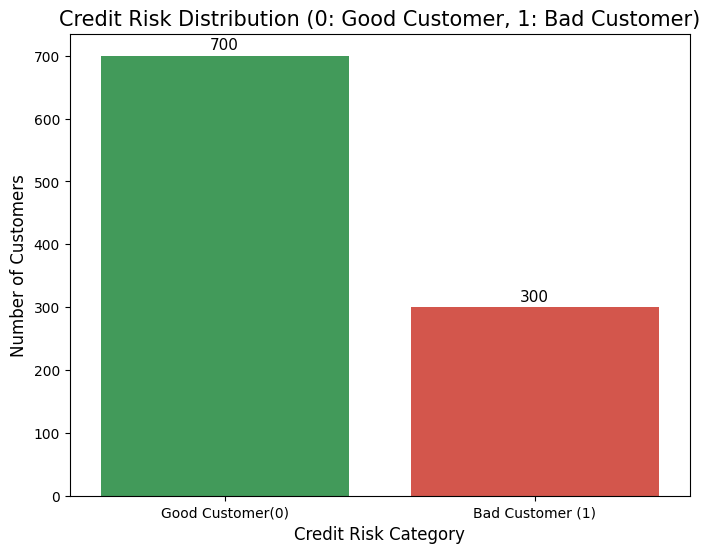

In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x='credit_risk', data=df, palette=['#34A853', '#EA4335']) # Green: Good, Red: Bad
plt.title('Credit Risk Distribution (0: Good Customer, 1: Bad Customer)', fontsize=15)
plt.xlabel('Credit Risk Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks([0, 1], ['Good Customer(0)', 'Bad Customer (1)'])

for i, count in enumerate(credit_risk_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=11)
plt.show()

### 2.3 Missing Data Analysis and Elimination

In this section, we will examine whether there is missing data (missing values) in the features in our data set. The presence of missing data can affect the accuracy of the analysis and model performance. Therefore, it is important to first detect missing data and, if any, eliminate it with appropriate methods.

In [ ]:
print("Number of Missing Data in Each Column:")
missing_values = df.isnull().sum()
print(missing_values)


total_missing = missing_values.sum()
print(total_missing)

columns_with_missing_values = missing_values[missing_values > 0]
if not columns_with_missing_values.empty:
    print("\nColumns with Missing Data and Numbers of Missing Data:")
    print(columns_with_missing_values)
    print("\nColumns with Missing Data and Missing Data Percentages:")
    print((columns_with_missing_values / len(df)) * 100)
else:
    print("\nThere is no missing data in any column in the data set..")

Number of Missing Data in Each Column:
existing_checking_account_status                 0
duration_in_month                                0
credit_history                                   0
purpose                                          0
credit_amount                                    0
savings_account_bonds                            0
present_employment_since                         0
installment_rate_percentage_disposable_income    0
personal_status_sex                              0
other_debtors_guarantors                         0
present_residence_since                          0
property                                         0
age_in_years                                     0
other_installment_plans                          0
housing                                          0
number_existing_credits_at_bank                  0
job                                              0
number_people_liable_maintenance                 0
telephone                                  

The number of missing data in all columns is 0. This confirms that there are no missing values ​​in this version of the German Credit Dataset.

The total number of missing data is also 0.

This means that we do not need additional steps such as filling in missing data or deleting rows/columns with missing data at this stage.

If there were missing data, different strategies (filling with mean/median/mode, model-based filling, deletion, etc.) would be considered depending on the nature and amount of these missing data. However, we can skip this step in the current case.

### 2.4 Outlier Analysis and Removal (For Numerical Features)

In this section, we will examine the outliers that may be present in the numerical features in our dataset. It is important to detect and handle outliers appropriately as they can negatively affect model performance. First, a visual inspection will be performed using boxplots, then potential outliers will be identified using the IQR (Interquartile Range) method.

Some numerical features (`installment_rate_percentage_disposable_income`, `present_residence_since`, `number_existing_credits_at_bank`, `number_people_liable_maintenance`) by their nature take a limited number of discrete integer values ​​(e.g. 1, 2, 3, 4). Standard boxplot and IQR-based outlier analysis for such features may not be as directly interpretable as other continuously distributed features, because the range of values ​​that these features can take is already limited, and the values ​​that would be considered "outliers" would usually be outside this expected range (such as data entry errors). A separate outlier analysis will not be performed for these features in this project, but their distributions will be examined in other analysis steps (e.g. histograms or frequency tables). Outlier analysis will focus on other numerical features that are more continuous and where outliers may be more meaningful.

In [ ]:

numerical_features_all = df.select_dtypes(include=np.number).columns.tolist()

discrete_numerical_to_exclude = [
    'installment_rate_percentage_disposable_income',
    'present_residence_since',
    'number_existing_credits_at_bank',
    'number_people_liable_maintenance'
]

if 'credit_risk' in numerical_features_all:
    numerical_features_all.remove('credit_risk')

numerical_features_for_outlier_analysis = [
    col for col in numerical_features_all if col not in discrete_numerical_to_exclude
]


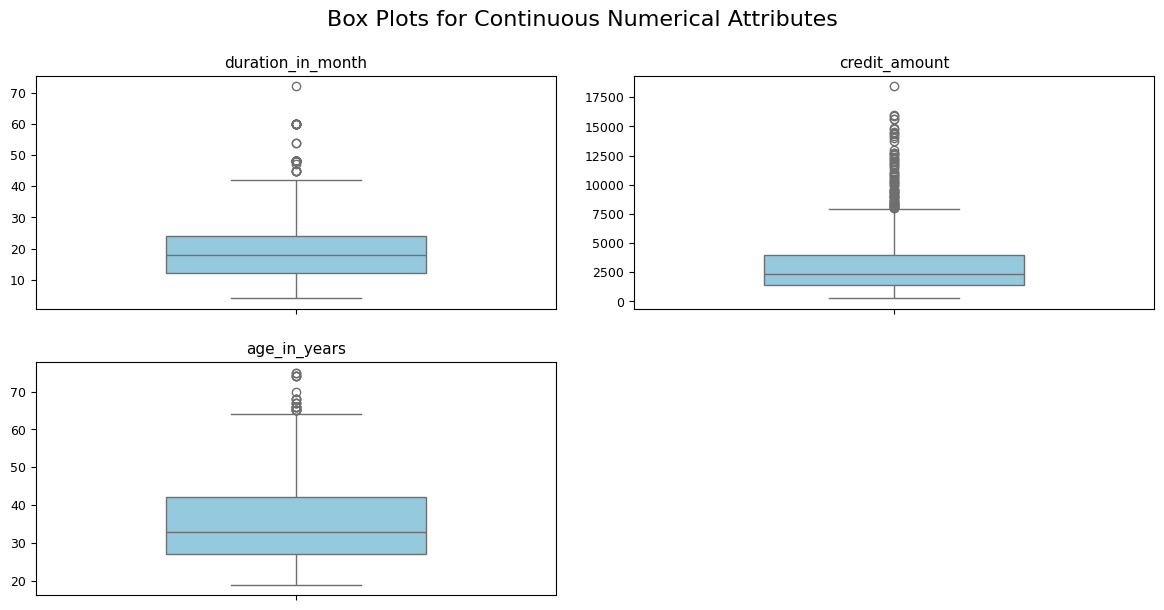

In [ ]:
if numerical_features_for_outlier_analysis: # Liste boş değilse çizdir
    plt.figure(figsize=(12, max(4, len(numerical_features_for_outlier_analysis) * 2))) # Figür boyutunu dinamik yapalım
    num_cols_boxplot = 2
    num_rows_boxplot = (len(numerical_features_for_outlier_analysis) + num_cols_boxplot - 1) // num_cols_boxplot

    for i, col in enumerate(numerical_features_for_outlier_analysis):
        plt.subplot(num_rows_boxplot, num_cols_boxplot, i + 1)
        sns.boxplot(y=df[col], color='skyblue', width=0.5)
        plt.title(f'{col}', fontsize=11)
        plt.ylabel('')
        plt.xticks(fontsize=9)
        plt.yticks(fontsize=9)

    plt.tight_layout(pad=2.0)
    plt.suptitle('Box Plots for Continuous Numerical Attributes', fontsize=16, y=1.03)
    plt.show()
else:
    print("There are no numerical features selected for outlier analysis.")

duration_in_month: Some points (potential outliers) are observed in the upper part of the graph. There are some cases where the credit period is well above the general distribution.

credit_amount: There are many and significant outliers (concentrated in the upper part) in this feature. The credit amount is distributed in a very wide range and some customers have credit amounts well above the average.

age_in_years: Some outliers can be observed in the upper part.

In [ ]:

print("\nOutlier Detection with IQR Method:")

outliers_summary_iqr_selected = {}

for col in numerical_features_for_outlier_analysis:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR_value = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR_value
    upper_bound = Q3 + 1.5 * IQR_value
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    outliers_summary_iqr_selected[col] = num_outliers

    if num_outliers > 0:
      print(f"\n'{col}' potential outliers for the feature:")
      print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR_value:.2f}")
      print(f"  Calculated Lower Limit: {lower_bound:.2f}, Calculated Upper Limit: {upper_bound:.2f}")
      print(f"  Number of calculated outlier: {num_outliers}")
    else:
      print(f"\nFor feature '{col}', There is no outlier value by IQR method (Lower: {lower_bound:.2f}, Upper: {upper_bound:.2f}).")




Outlier Detection with IQR Method:

'duration_in_month' potential outliers for the feature:
  Q1: 12.00, Q3: 24.00, IQR: 12.00
  Calculated Lower Limit: -6.00, Calculated Upper Limit: 42.00
  Number of calculated outlier: 70

'credit_amount' potential outliers for the feature:
  Q1: 1365.50, Q3: 3972.25, IQR: 2606.75
  Calculated Lower Limit: -2544.62, Calculated Upper Limit: 7882.38
  Number of calculated outlier: 72

'age_in_years' potential outliers for the feature:
  Q1: 27.00, Q3: 42.00, IQR: 15.00
  Calculated Lower Limit: 4.50, Calculated Upper Limit: 64.50
  Number of calculated outlier: 23


The outliers detected, especially in features like loan_amount, can naturally hide a part of the financial data. These values ​​may represent specific customer segments or loan types. Therefore, these erroneous values ​​will not be deleted from the dataset or directly replaced. Instead, progressively more robust implementations of the product (e.g. Random Forest) will be preferred or feature transformations (e.g. logarithmic transformation) will be evaluated. Our goal is to preserve the generalization ability of the models while minimizing information loss.

### 2.5. Analysis of Categorical Features

In this section, the categorical features in our dataset will be examined. The distribution of different categories within each categorical feature and the relationship of these categories with our target variable `credit_risk` will be analyzed. These analyses will help us understand the potential roles of the features in determining credit risk.

In [ ]:
categorical_features = df.select_dtypes(include='object').columns.tolist()

print("Categorical features to be analyzed:")
print(categorical_features)

Categorical features to be analyzed:
['existing_checking_account_status', 'credit_history', 'purpose', 'savings_account_bonds', 'present_employment_since', 'personal_status_sex', 'other_debtors_guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']



--- Analysis of Feature 'existing_checking_account_status'  ---

Category Frequences:
existing_checking_account_status
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64
existing_checking_account_status
A14    39.4
A11    27.4
A12    26.9
A13     6.3
Name: proportion, dtype: float64


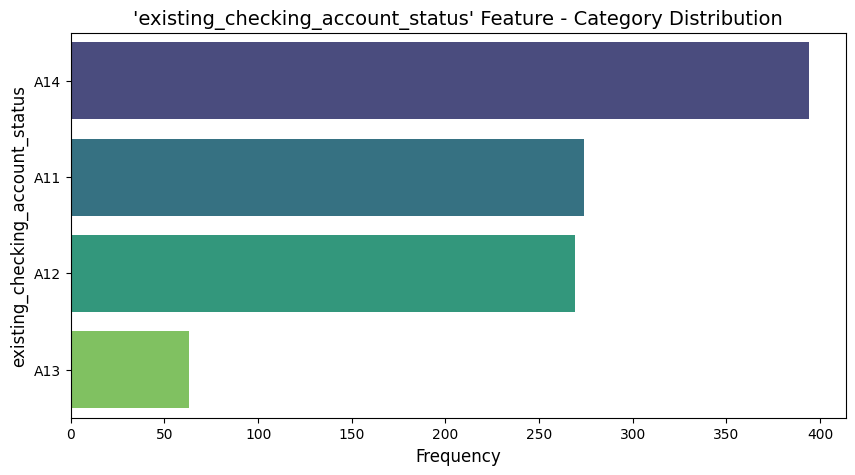

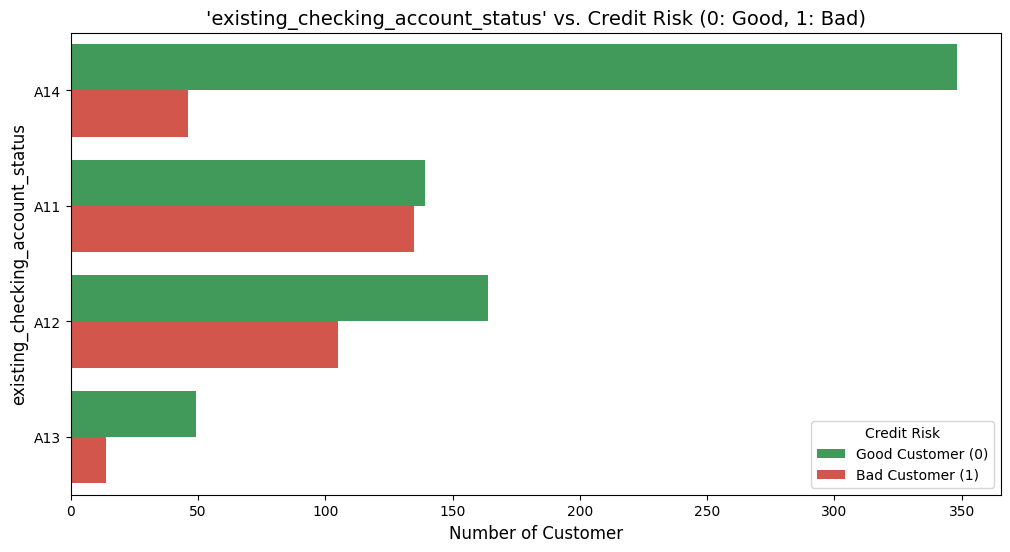


--- Analysis of Feature 'credit_history'  ---

Category Frequences:
credit_history
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64
credit_history
A32    53.0
A34    29.3
A33     8.8
A31     4.9
A30     4.0
Name: proportion, dtype: float64


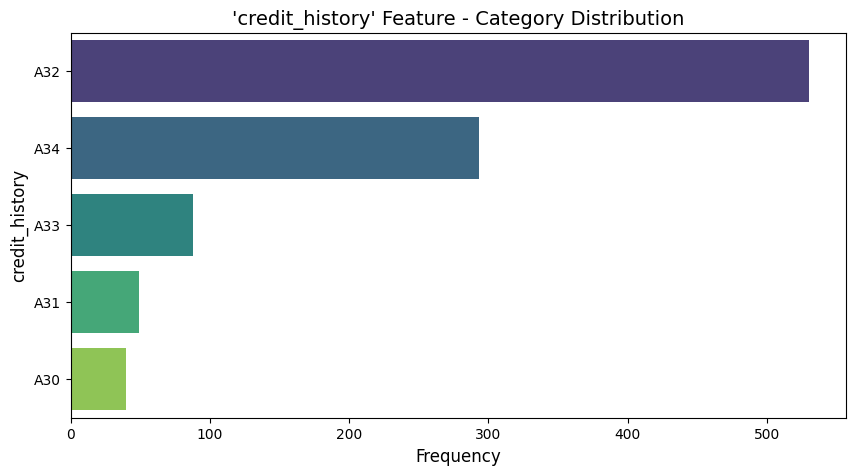

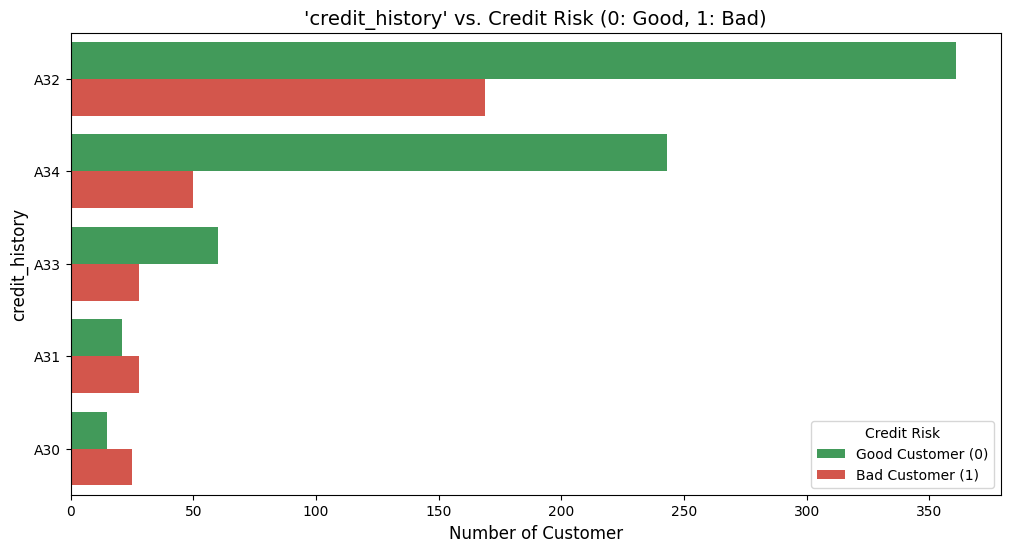


--- Analysis of Feature 'purpose'  ---

Category Frequences:
purpose
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64
purpose
A43     28.0
A40     23.4
A42     18.1
A41     10.3
A49      9.7
A46      5.0
A45      2.2
A44      1.2
A410     1.2
A48      0.9
Name: proportion, dtype: float64


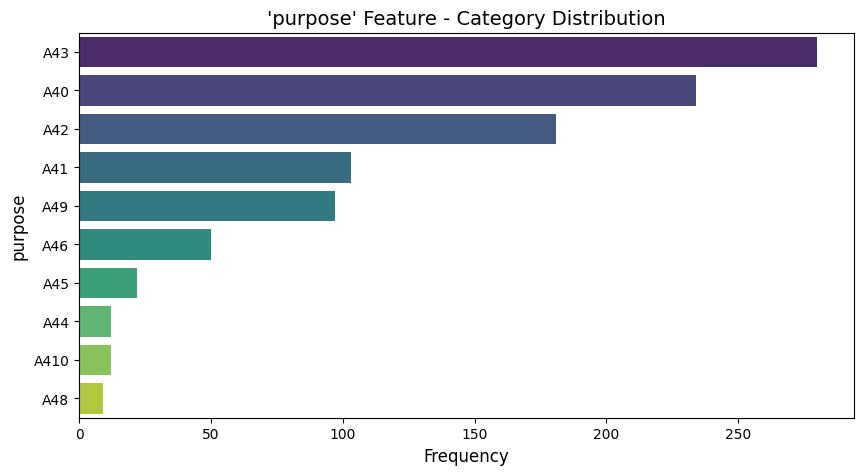

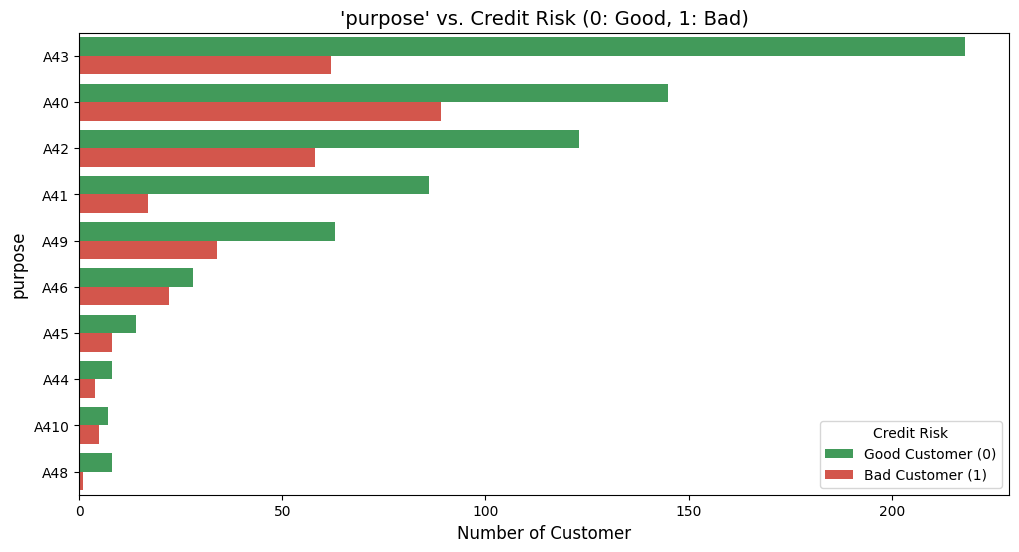


--- Analysis of Feature 'savings_account_bonds'  ---

Category Frequences:
savings_account_bonds
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64
savings_account_bonds
A61    60.3
A65    18.3
A62    10.3
A63     6.3
A64     4.8
Name: proportion, dtype: float64


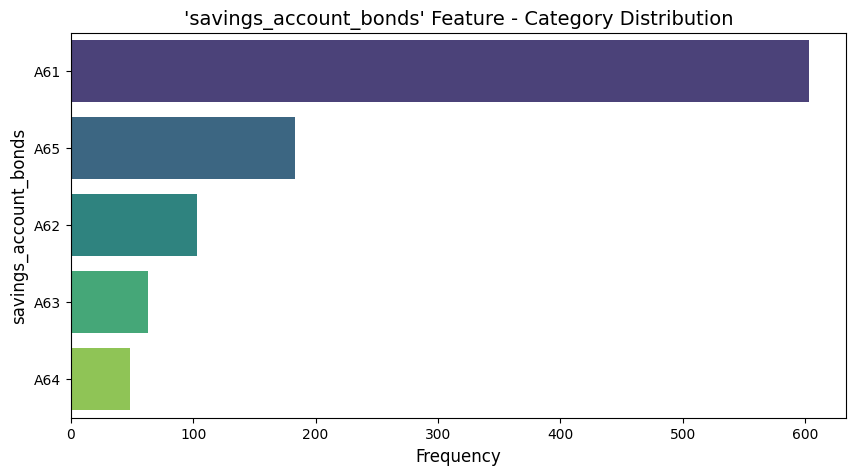

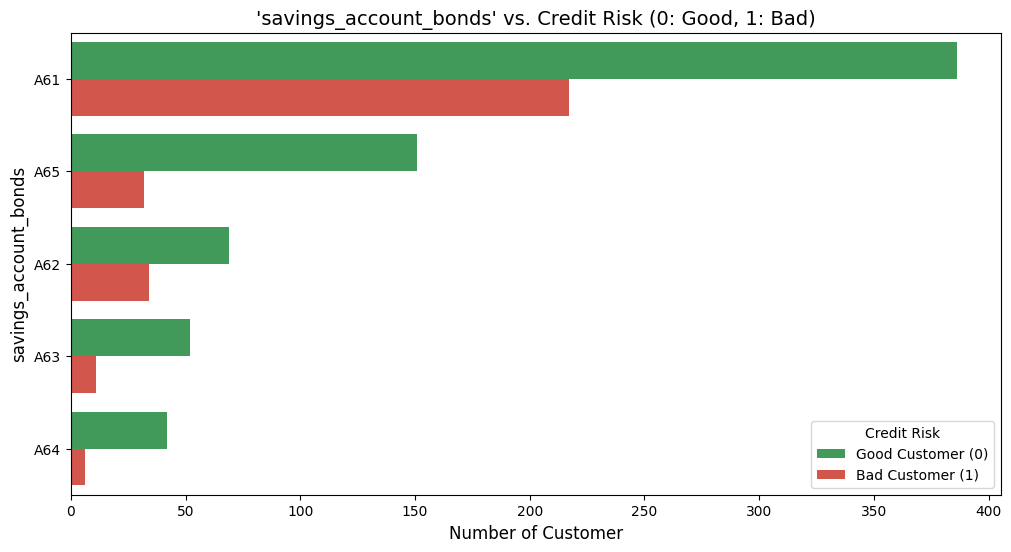


--- Analysis of Feature 'present_employment_since'  ---

Category Frequences:
present_employment_since
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64
present_employment_since
A73    33.9
A75    25.3
A74    17.4
A72    17.2
A71     6.2
Name: proportion, dtype: float64


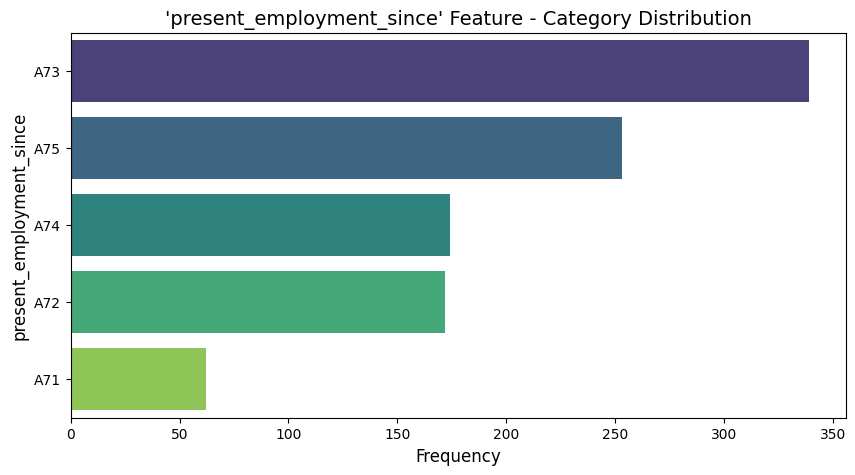

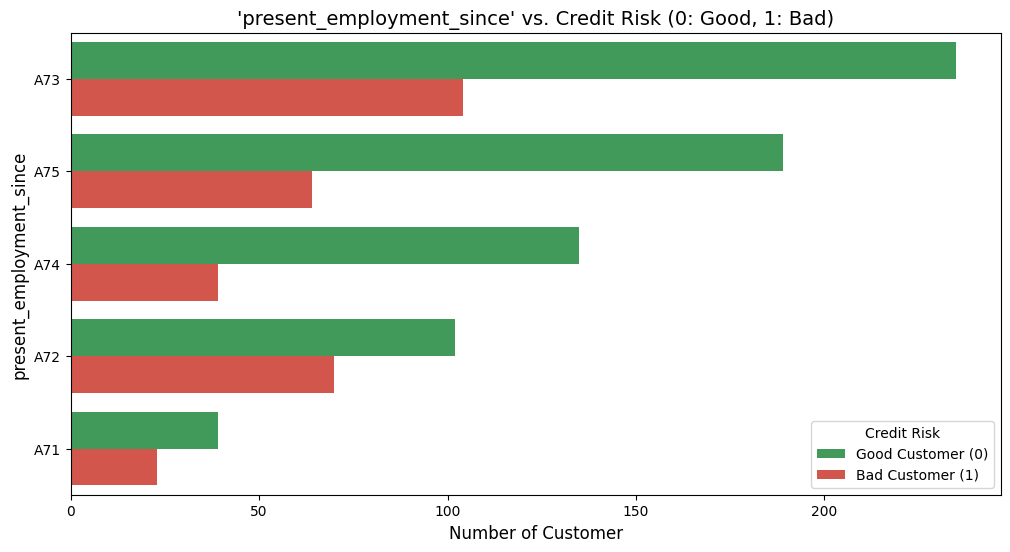


--- Analysis of Feature 'personal_status_sex'  ---

Category Frequences:
personal_status_sex
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64
personal_status_sex
A93    54.8
A92    31.0
A94     9.2
A91     5.0
Name: proportion, dtype: float64


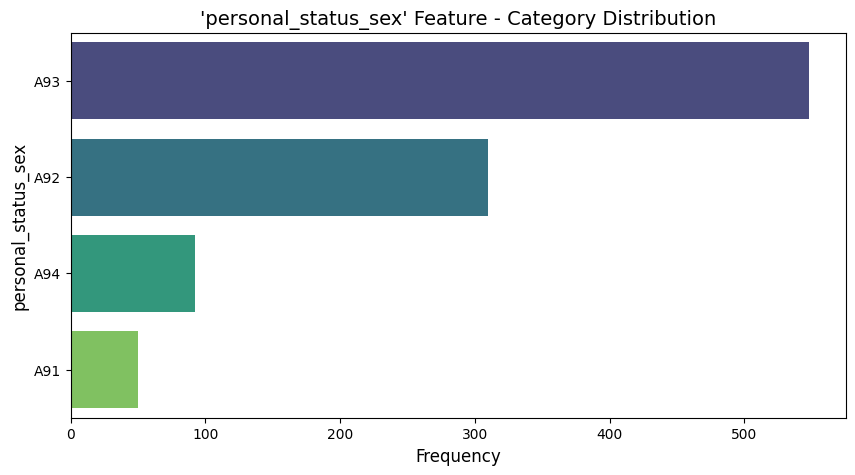

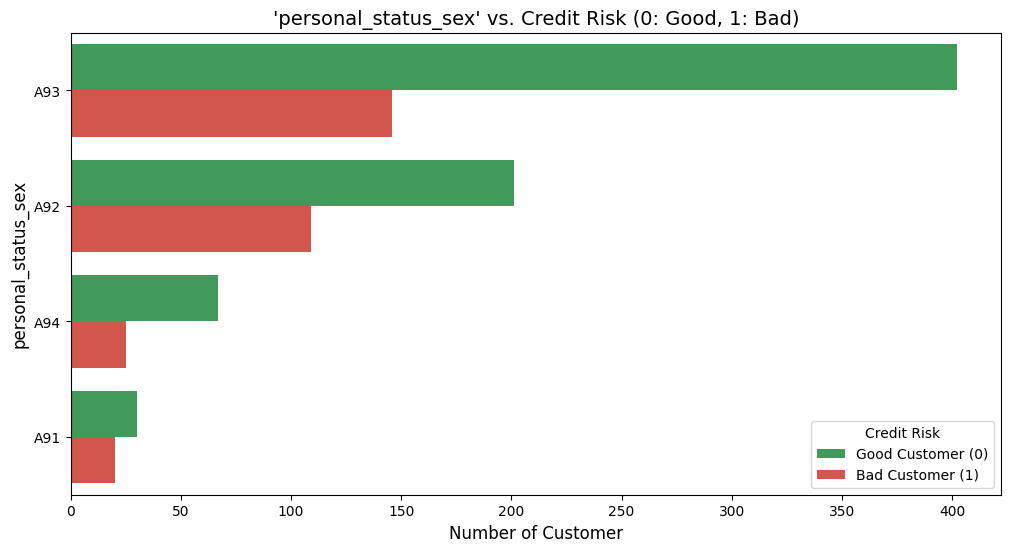


--- Analysis of Feature 'other_debtors_guarantors'  ---

Category Frequences:
other_debtors_guarantors
A101    907
A103     52
A102     41
Name: count, dtype: int64
other_debtors_guarantors
A101    90.7
A103     5.2
A102     4.1
Name: proportion, dtype: float64


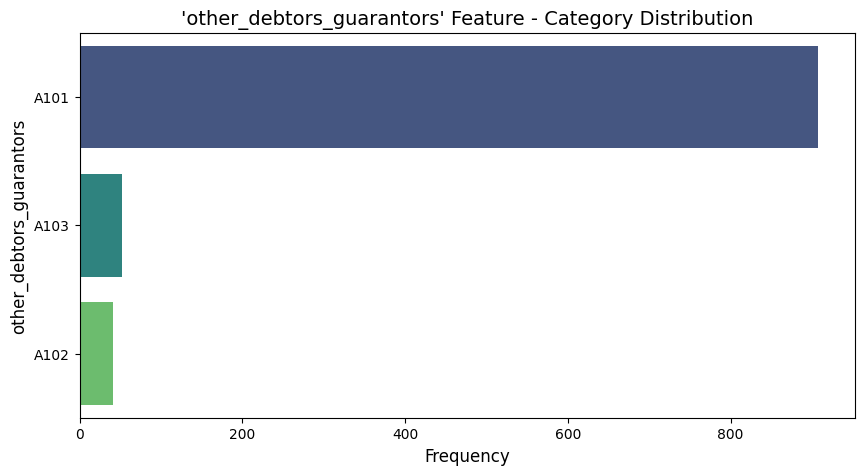

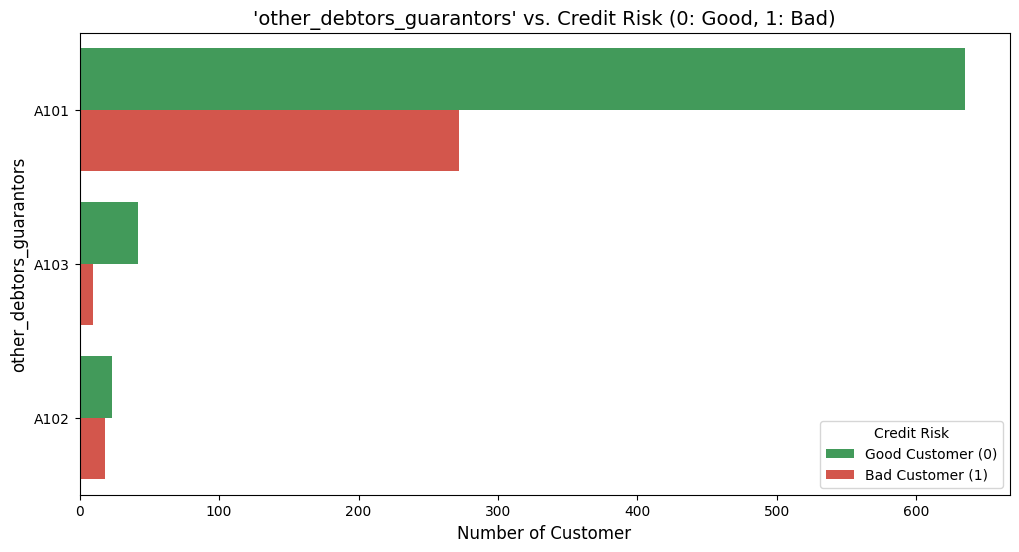


--- Analysis of Feature 'property'  ---

Category Frequences:
property
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64
property
A123    33.2
A121    28.2
A122    23.2
A124    15.4
Name: proportion, dtype: float64


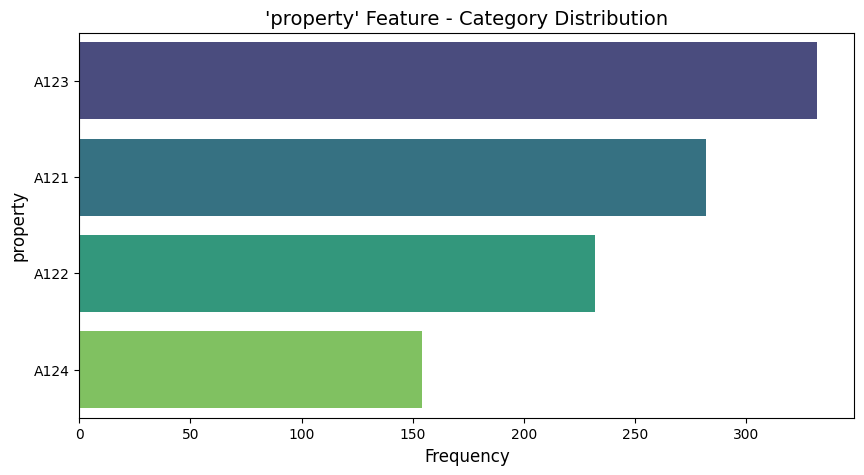

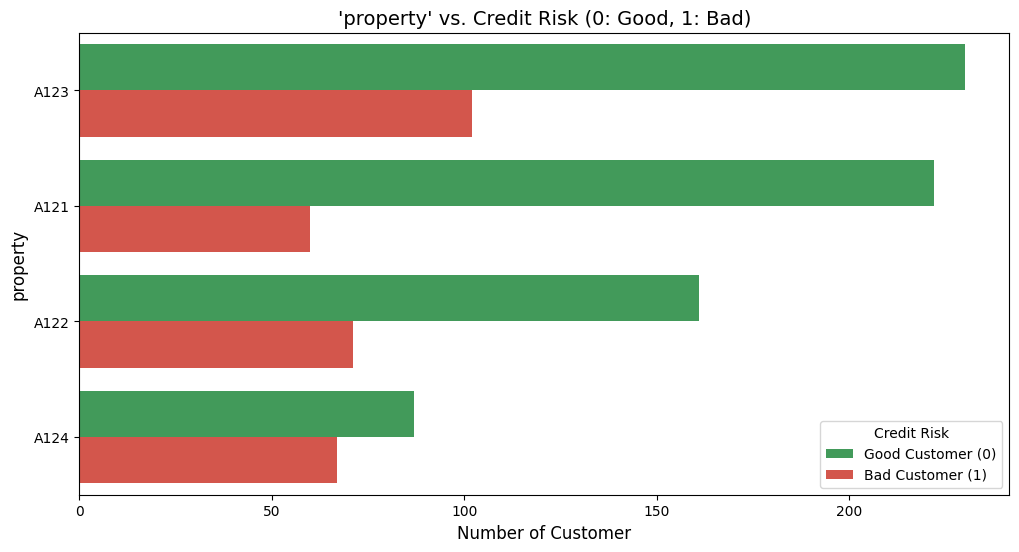


--- Analysis of Feature 'other_installment_plans'  ---

Category Frequences:
other_installment_plans
A143    814
A141    139
A142     47
Name: count, dtype: int64
other_installment_plans
A143    81.4
A141    13.9
A142     4.7
Name: proportion, dtype: float64


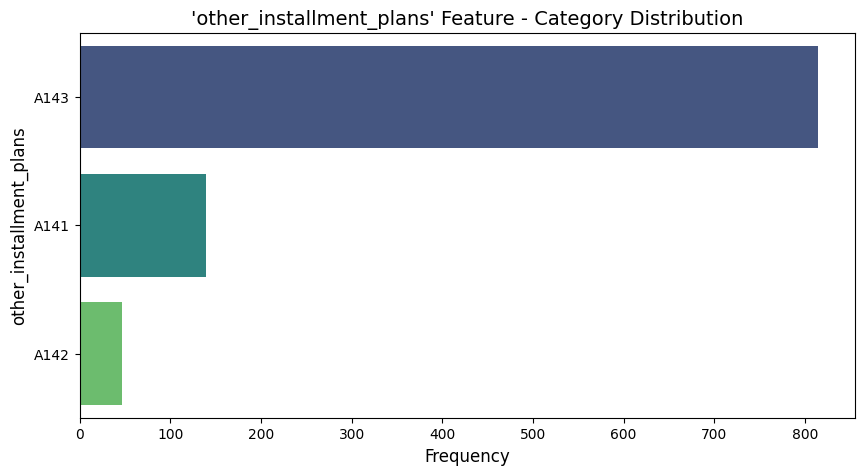

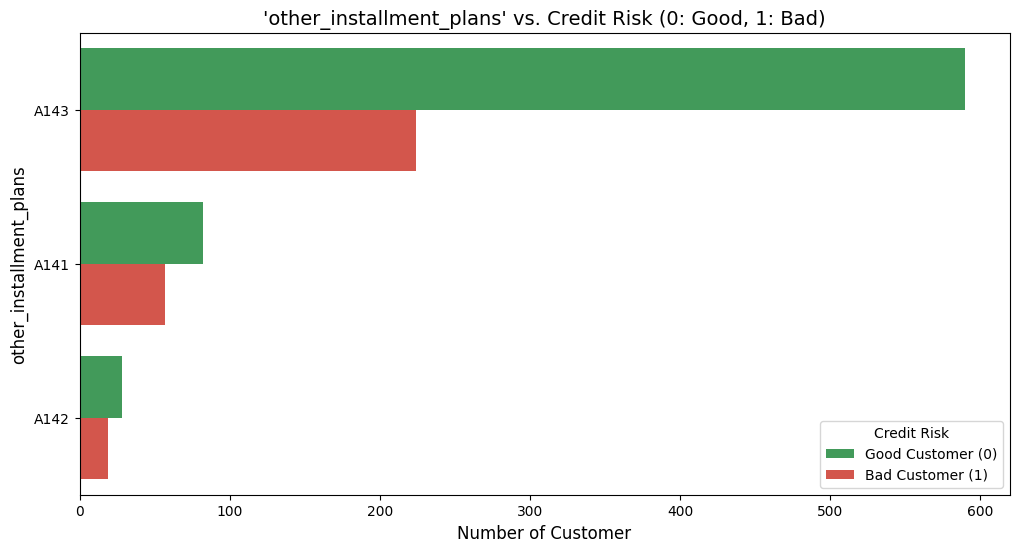


--- Analysis of Feature 'housing'  ---

Category Frequences:
housing
A152    713
A151    179
A153    108
Name: count, dtype: int64
housing
A152    71.3
A151    17.9
A153    10.8
Name: proportion, dtype: float64


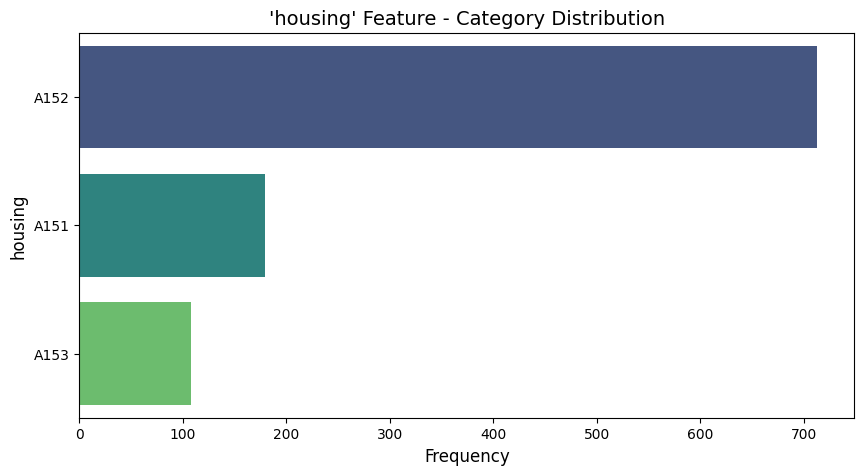

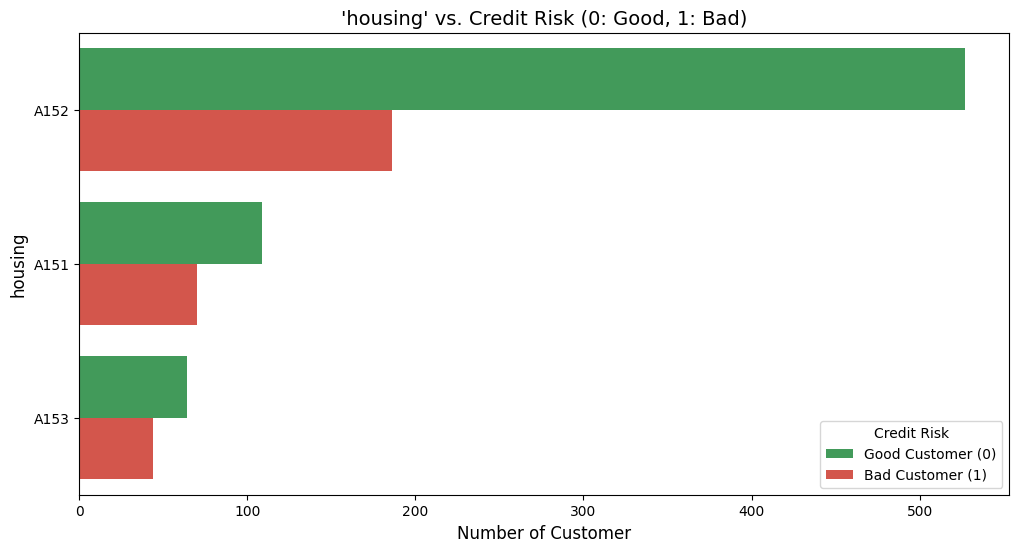


--- Analysis of Feature 'job'  ---

Category Frequences:
job
A173    630
A172    200
A174    148
A171     22
Name: count, dtype: int64
job
A173    63.0
A172    20.0
A174    14.8
A171     2.2
Name: proportion, dtype: float64


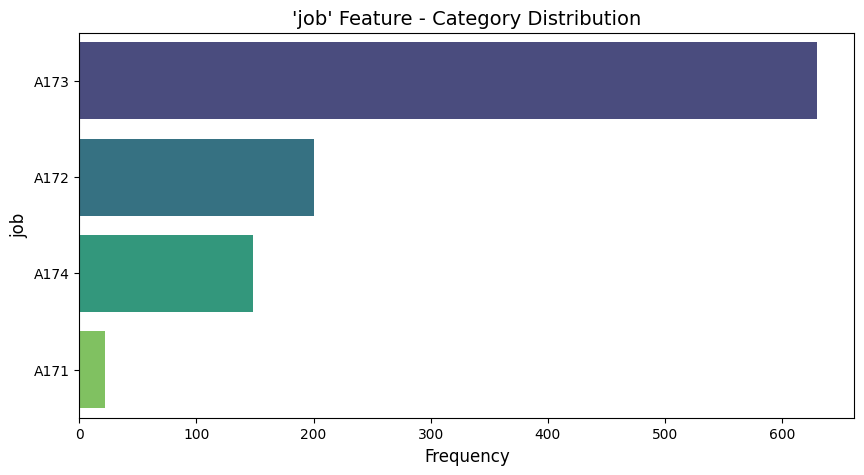

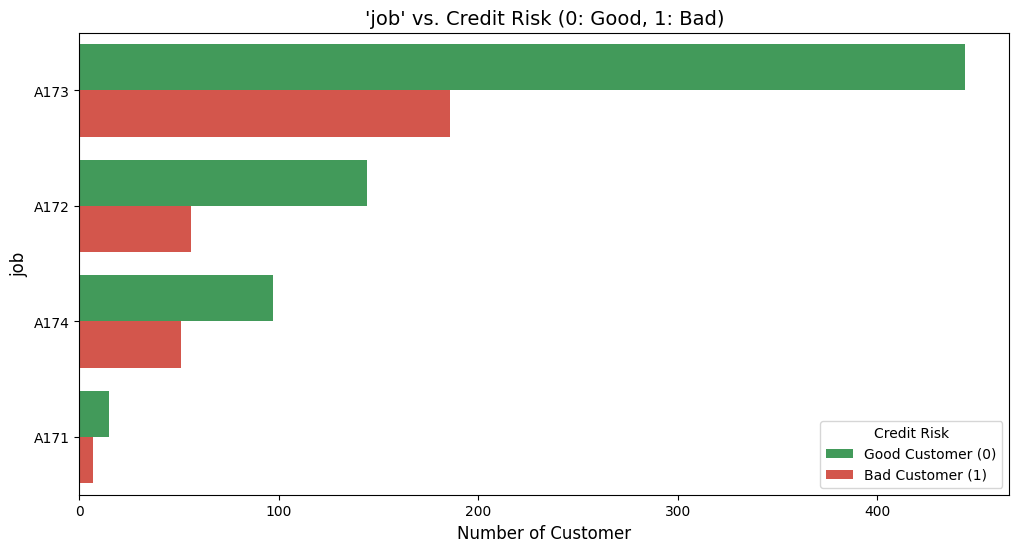


--- Analysis of Feature 'telephone'  ---

Category Frequences:
telephone
A191    596
A192    404
Name: count, dtype: int64
telephone
A191    59.6
A192    40.4
Name: proportion, dtype: float64


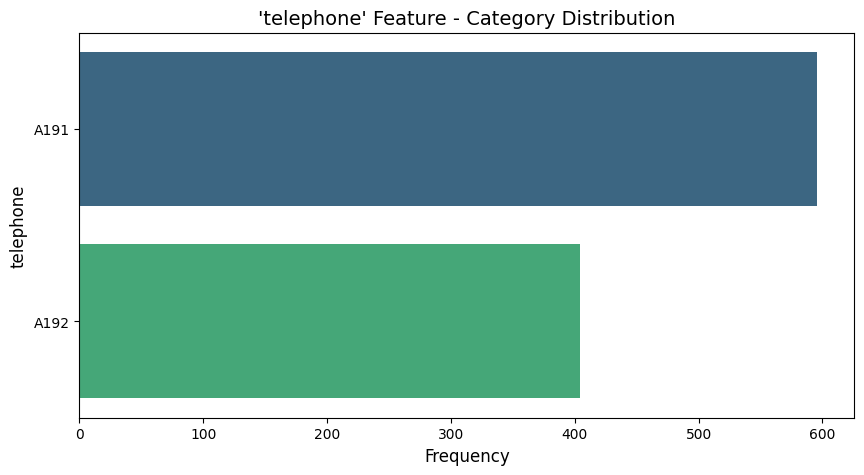

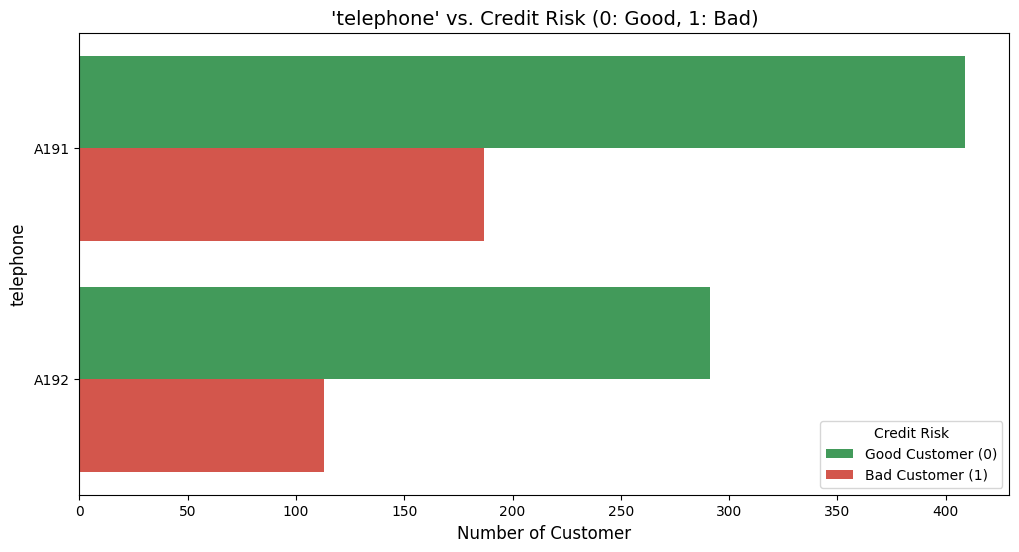


--- Analysis of Feature 'foreign_worker'  ---

Category Frequences:
foreign_worker
A201    963
A202     37
Name: count, dtype: int64
foreign_worker
A201    96.3
A202     3.7
Name: proportion, dtype: float64


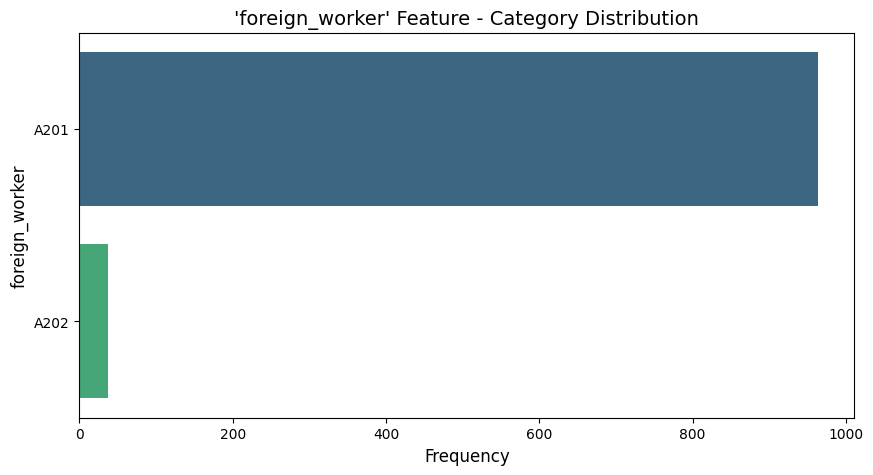

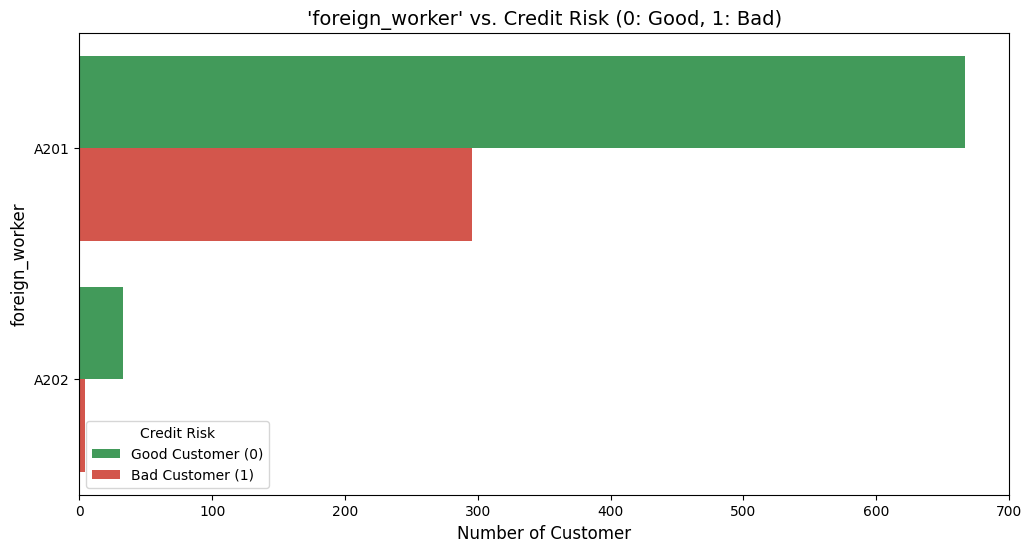

In [ ]:
for col in categorical_features:
    print(f"\n--- Analysis of Feature '{col}'  ---")

    print("\nCategory Frequences:")
    print(df[col].value_counts(dropna=False))
    print(df[col].value_counts(normalize=True, dropna=False) * 100)

    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"'{col}' Feature - Category Distribution", fontsize=14)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, hue='credit_risk', data=df, order=df[col].value_counts().index, palette=['#34A853', '#EA4335'])
    plt.title(f"'{col}' vs. Credit Risk (0: Good, 1: Bad)", fontsize=14)
    plt.xlabel("Number of Customer", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.legend(title='Credit Risk', labels=['Good Customer (0)', 'Bad Customer (1)'])
    plt.show()



## Existing Checking Account Status

**Frequency Distribution:**
Most customers have no checking account (A14, 39.4%) or negative balance (A11, 27.4%), with fewer having small balances (A12, 26.9%) or larger balances (A13, 6.3%).

**Relationship with Credit Risk:**
- A14 (no account): Lowest risk, suggesting financial discipline or alternative banking arrangements
- A11 (negative balance): Highest risk, indicating current financial difficulties
- A12 (0-200 DM): Medium risk, financially limited but not negative
- A13 (200+ DM): Low risk but small sample, shows financial stability

## Credit History

**Frequency Distribution:**
Most customers (53%) have current credits in good standing (A32), followed by credits at other banks (29.3%, A34), with smaller groups having past delays (8.8%, A33), completed credits (4.9%, A31), or no history (4%, A30).

**Relationship with Credit Risk:**
- A32 (current credits paid duly): Positive indicator but not perfect predictor
- A34 (credits at other banks): Surprisingly good risk profile despite "critical" label
- A33 (past delays): Better than expected, suggesting people learn from mistakes
- A31 (all credits paid): Unexpectedly shows slightly higher risk
- A30 (no history): Shows highest bad-to-good ratio, suggesting credit inexperience is risky

## Purpose

**Frequency Distribution:**
Most loans are for electronics (28%), new cars (23.4%), and furniture (18.1%), with used cars and business loans (about 10% each) and smaller categories making up the rest.

**Relationship with Credit Risk:**
- A43 (radio/TV): Best risk profile, likely due to smaller loan amounts
- A40 (new car): Higher risk despite tangible asset, reflecting larger commitment
- A42 (furniture): Moderate risk profile
- A41 (used car): Better risk profile than new cars, supporting financial wisdom of used purchases
- A49 (business): Mixed profile reflecting both income potential and inherent risks
- Other purposes show varied patterns but smaller sample sizes

## Savings Accounts/Bonds

**Frequency Distribution:**
Most customers (60.3%) have minimal savings (<100 DM), with declining percentages as savings increase: unknown/none (18.3%), 100-500 DM (10.3%), 500-1000 DM (6.3%), and 1000+ DM (4.8%).

**Relationship with Credit Risk:**
- Clear correlation between higher savings and lower risk
- A61 (<100 DM): Concerning risk profile despite being most common
- A65 (unknown/none): Surprisingly better than very low savings
- A62-A64: Progressively better risk profiles as savings increase
- A64 (1000+ DM): Nearly perfect risk profile, demonstrating financial discipline

## Present Employment Duration

**Frequency Distribution:**
Employment durations are: 1-4 years (33.9%), 7+ years (25.3%), 4-7 years (17.4%), <1 year (17.2%), and unemployed (6.2%).

**Relationship with Credit Risk:**
- Longer employment correlates with better risk profiles
- 4-year mark appears to be significant threshold for improved risk
- A71 (unemployed): Better risk than <1 year employed, suggesting alternative resources
- A75 (7+ years): Significantly better risk profile than shorter durations
- A72 (<1 year): Higher risk, reflecting career instability

## Personal Status and Sex

**Frequency Distribution:**
Single males predominate (54.8%), followed by females with various marital statuses (31%), married/widowed males (9.2%), and divorced/separated males (5%).

**Relationship with Credit Risk:**
- A94 (married/widowed males): Best risk profile despite small group size
- A93 (single males): Moderate risk and largest absolute number of defaults
- A92 (females, various statuses): Similar to single males but slightly worse
- A91 (divorced/separated males): Surprisingly good profile despite potential financial challenges

## Other Debtors/Guarantors

**Frequency Distribution:**
Most loans (90.7%) have no co-applicants or guarantors, with few having guarantors (5.2%) or co-applicants (4.1%).

**Relationship with Credit Risk:**
- A103 (guarantor): Dramatically improved risk profile
- A102 (co-applicant): Better than sole applicants but not as good as guarantors
- A101 (none): Reasonable but higher risk than backed loans

## Property

**Frequency Distribution:**
Asset distribution: cars/other assets (33.2%), real estate (28.2%), savings/insurance (23.2%), none/unknown (15.4%).

**Relationship with Credit Risk:**
- A121 (real estate): Best risk profile, indicating financial stability
- A123 (car/other): Surprisingly positive profile, similar to real estate
- A122 (savings/insurance): Good profile showing financial discipline
- A124 (none/unknown): Least favorable risk profile as expected

## Other Installment Plans

**Frequency Distribution:**
Most customers (81.4%) have no other plans, with some having bank plans (13.9%) and few having store plans (4.7%).

**Relationship with Credit Risk:**
- A143 (none): Best profile, suggesting available financial capacity
- A141 (bank): Good but less favorable than none, indicating partial capacity consumption
- A142 (store): Similar to bank plans despite different source

## Housing

**Frequency Distribution:**
Most customers rent (71.3%), followed by homeowners (17.9%) and those living for free (10.8%).

**Relationship with Credit Risk:**
- Surprisingly similar risk profiles across all housing categories
- All show about 2:1 good-to-bad ratio, suggesting housing status less predictive than other factors

## Job

**Frequency Distribution:**
Most customers are skilled employees (63%), followed by unskilled residents (20%), management/self-employed (14.8%), and unemployed/non-resident (2.2%).

**Relationship with Credit Risk:**
- A172 (unskilled resident): Unexpectedly favorable risk profile
- A173 (skilled): Positive but contains highest absolute number of defaults
- A174 (management/self-employed): Similar to unskilled rather than lowest risk
- A171 (unemployed/non-resident): Reasonable profile despite presumed risk

## Telephone

**Frequency Distribution:**
Most customers (59.6%) don't have registered telephones, while 40.4% do.

**Relationship with Credit Risk:**
- A192 (registered phone): Significantly better risk profile
- A191 (none): Higher proportion of bad customers, suggesting less stability

## Foreign Worker

**Frequency Distribution:**
The vast majority (96.3%) are foreign workers, with only 3.7% non-foreign.

**Relationship with Credit Risk:**
- A201 (foreign): Mirrors overall dataset with about 2:1 good-to-bad ratio
- A202 (non-foreign): Appears better but tiny sample limits conclusions

### 2.6. Analysis of Numerical Features

In this section, the numerical features included in the dataset will be examined in detail. The status of each numerical feature (histogram and scatter plots), measures of central tendency and dispersion (also through box plots), and the analysis of these features in relation to the target variable `credit_risk`.

In [ ]:
numerical_features_all = df.select_dtypes(include=np.number).columns.tolist()
if 'credit_risk' in numerical_features_all:
    numerical_features_all.remove('credit_risk')

print("Analiz edilecek tüm sayısal özellikler:")
print(numerical_features_all)

Analiz edilecek tüm sayısal özellikler:
['duration_in_month', 'credit_amount', 'installment_rate_percentage_disposable_income', 'present_residence_since', 'age_in_years', 'number_existing_credits_at_bank', 'number_people_liable_maintenance']



--- Analysis of Feature'duration_in_month'---


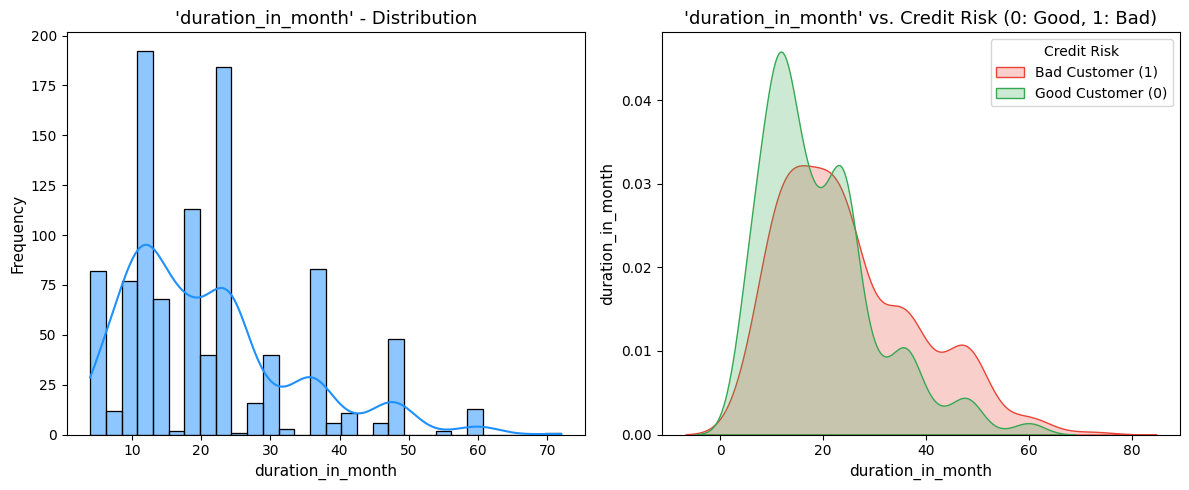


'descriptive statistics for duration_in_month':


,duration_in_month
count,1000.000000
mean,20.903000
std,12.058814
min,4.000000
25%,12.000000
50%,18.000000
75%,24.000000
max,72.000000



'Average values ​​according to credit risk for duration_in_month':


,duration_in_month
credit_risk,
0,19.207143
1,24.860000


----------------------------------------------------------------------

--- Analysis of Feature'credit_amount'---


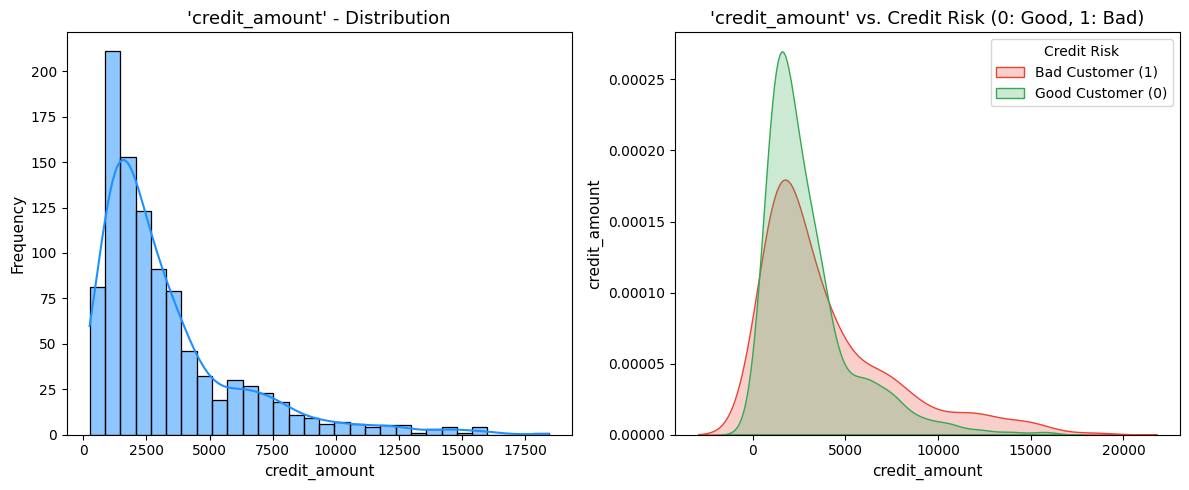


'descriptive statistics for credit_amount':


,credit_amount
count,1000.000000
mean,3271.258000
std,2822.736876
min,250.000000
25%,1365.500000
50%,2319.500000
75%,3972.250000
max,18424.000000



'Average values ​​according to credit risk for credit_amount':


,credit_amount
credit_risk,
0,2985.457143
1,3938.126667


----------------------------------------------------------------------

--- Analysis of Feature'installment_rate_percentage_disposable_income'---


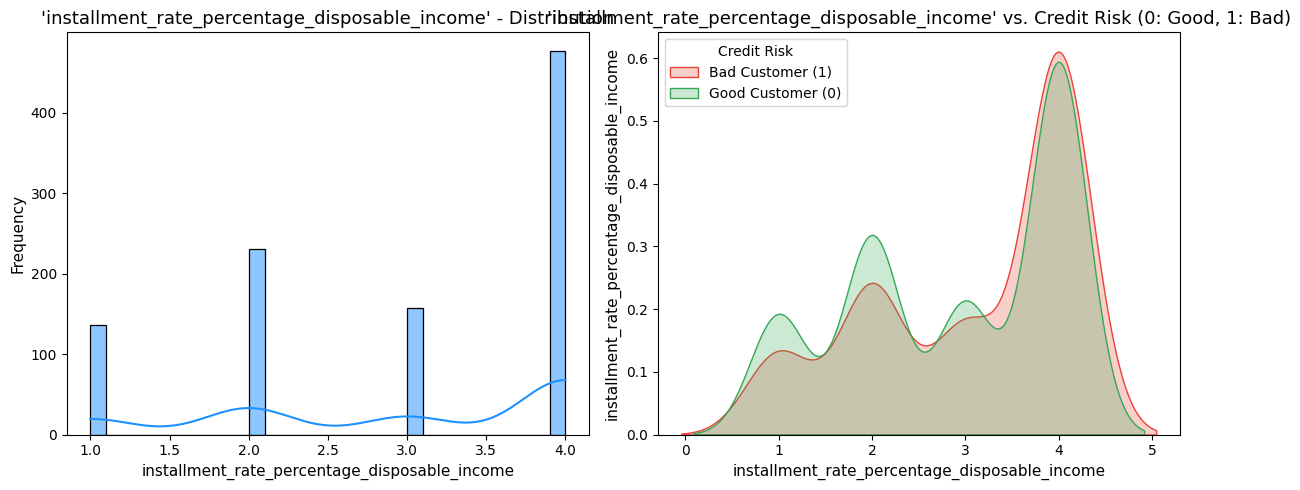


'descriptive statistics for installment_rate_percentage_disposable_income':


,installment_rate_percentage_disposable_income
count,1000.000000
mean,2.973000
std,1.118715
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000



'Average values ​​according to credit risk for installment_rate_percentage_disposable_income':


,installment_rate_percentage_disposable_income
credit_risk,
0,2.920000
1,3.096667


----------------------------------------------------------------------

--- Analysis of Feature'present_residence_since'---


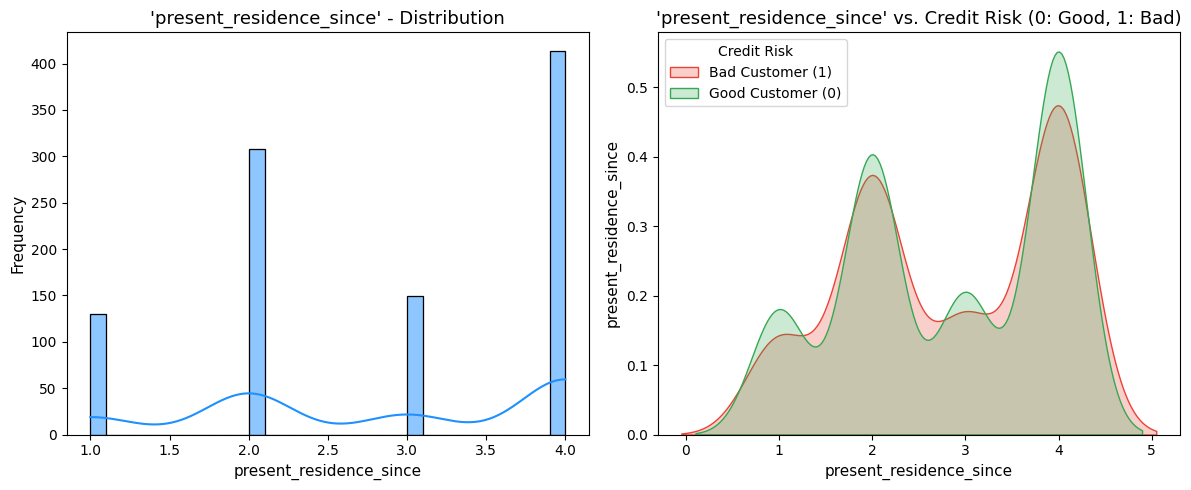


'descriptive statistics for present_residence_since':


,present_residence_since
count,1000.000000
mean,2.845000
std,1.103718
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,4.000000



'Average values ​​according to credit risk for present_residence_since':


,present_residence_since
credit_risk,
0,2.842857
1,2.850000


----------------------------------------------------------------------

--- Analysis of Feature'age_in_years'---


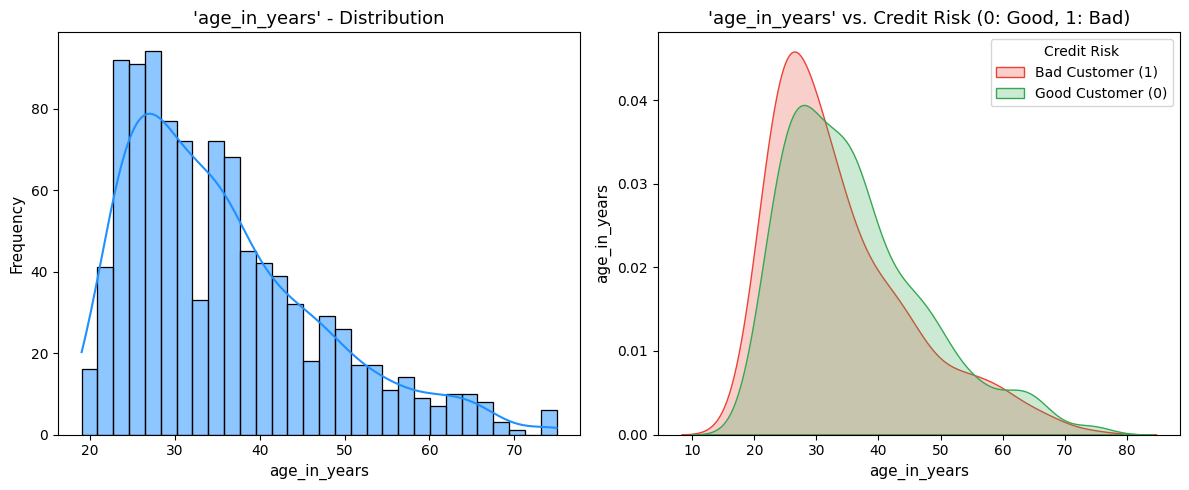


'descriptive statistics for age_in_years':


,age_in_years
count,1000.000000
mean,35.546000
std,11.375469
min,19.000000
25%,27.000000
50%,33.000000
75%,42.000000
max,75.000000



'Average values ​​according to credit risk for age_in_years':


,age_in_years
credit_risk,
0,36.224286
1,33.963333


----------------------------------------------------------------------

--- Analysis of Feature'number_existing_credits_at_bank'---


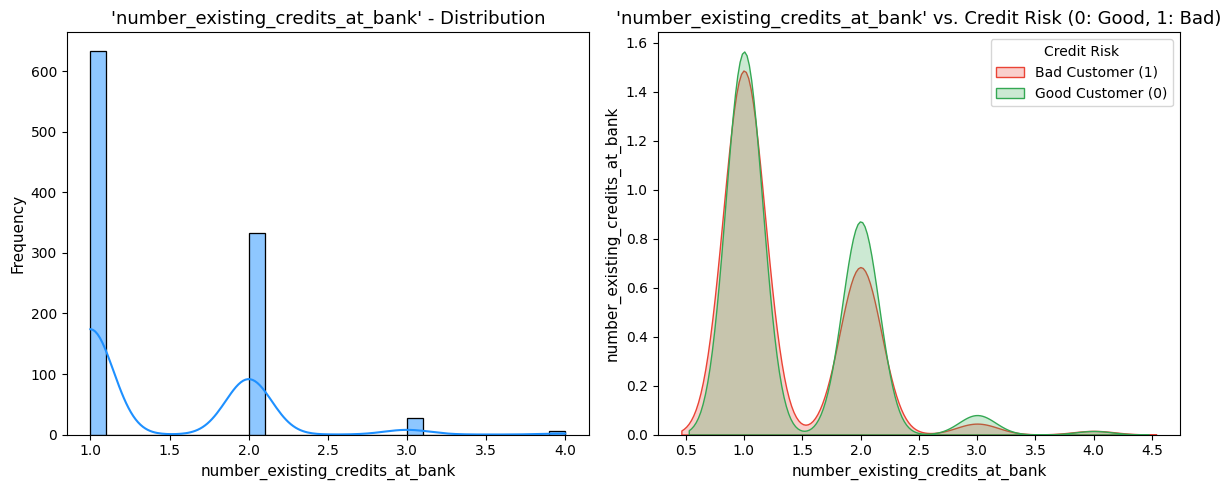


'descriptive statistics for number_existing_credits_at_bank':


,number_existing_credits_at_bank
count,1000.000000
mean,1.407000
std,0.577654
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000



'Average values ​​according to credit risk for number_existing_credits_at_bank':


,number_existing_credits_at_bank
credit_risk,
0,1.424286
1,1.366667


----------------------------------------------------------------------

--- Analysis of Feature'number_people_liable_maintenance'---


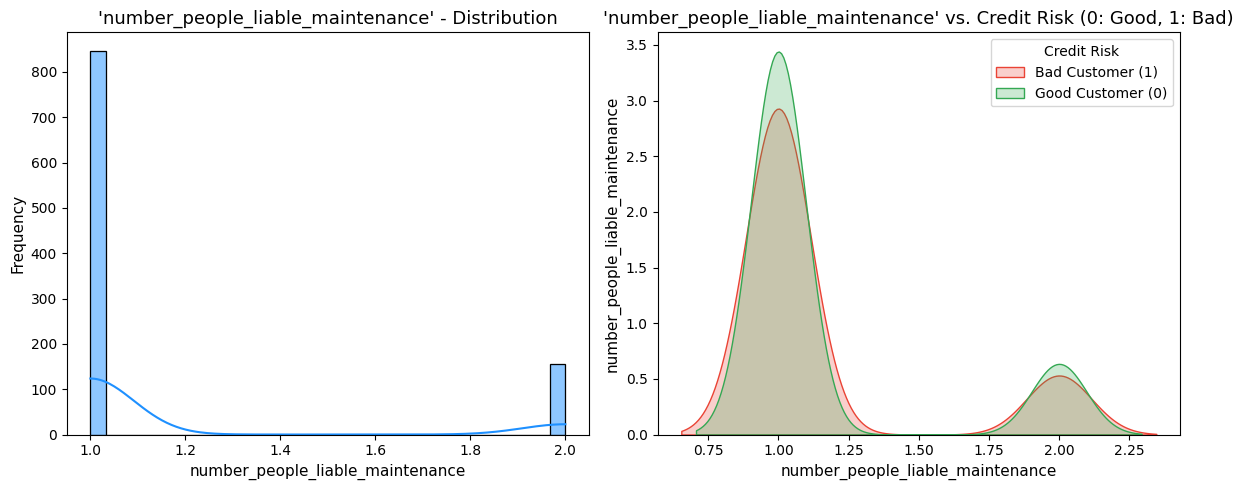


'descriptive statistics for number_people_liable_maintenance':


,number_people_liable_maintenance
count,1000.000000
mean,1.155000
std,0.362086
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000



'Average values ​​according to credit risk for number_people_liable_maintenance':


,number_people_liable_maintenance
credit_risk,
0,1.155714
1,1.153333


----------------------------------------------------------------------


In [ ]:

for col in numerical_features_all:
    print(f"\n--- Analysis of Feature'{col}'---")


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='dodgerblue', bins=30)
    plt.title(f"'{col}' - Distribution", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Frequency", fontsize=11)


    plt.subplot(1, 2, 2)
    sns.kdeplot(data=df, x=col, hue='credit_risk', fill=True, palette=['#34A853', '#EA4335'], common_norm=False)
    # Alternatif olarak boxplot:
    # sns.boxplot(data=df, x='credit_risk', y=col, palette=['#34A853', '#EA4335'])
    plt.title(f"'{col}' vs. Credit Risk (0: Good, 1: Bad)", fontsize=13)
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Density" if isinstance(sns.kdeplot, type) else col, fontsize=11)
    plt.legend(title='Credit Risk', labels=['Bad Customer (1)', 'Good Customer (0)'])
    plt.tight_layout()
    plt.show()

    # Betimsel istatistikleri tekrar hatırlayalım (özellikle bu özellik için)
    print(f"\n'descriptive statistics for {col}':")
    display(df[col].describe())
    print(f"\n'Average values ​​according to credit risk for {col}':")
    display(df.groupby('credit_risk')[col].mean())
    print("-" * 70)

# Numerical Features Analysis for Credit Risk

## Duration in Month

**Frequency Distribution:**
The loan duration ranges from 4 to 72 months, with a mean of 20.9 months. The distribution shows peaks at certain intervals (12, 24, and 36 months), suggesting standardized loan term options. The most common durations are at 12 and 24 months, with a right-skewed distribution.

**Relationship with Credit Risk:**
Bad customers have significantly longer average loan durations (24.9 months) compared to good customers (19.2 months). The density plot clearly shows that as loan duration increases, the proportion of bad customers increases. This makes intuitive financial sense - longer loans expose lenders to extended risk periods and may indicate borrowers stretching their finances.

## Credit Amount

**Frequency Distribution:**
Credit amounts range from 250 to 18,424 DM with a mean of 3,271 DM. The distribution is heavily right-skewed with most loans clustered at lower amounts (below 5,000 DM). The median (2,320 DM) is noticeably lower than the mean, further indicating the right-skewed nature.

**Relationship with Credit Risk:**
Bad customers borrow larger amounts on average (3,938 DM) compared to good customers (2,985 DM). The density plot shows higher representation of bad customers in the higher loan amount ranges. This correlation suggests that larger loans either attract higher-risk customers or create repayment strain, increasing default probability.

## Installment Rate Percentage Disposable Income

**Frequency Distribution:**
This feature shows the percentage of disposable income used for loan payments, with values of 1%, 2%, 3%, or 4%. The distribution is discrete with the highest frequency at 4% (nearly half the customers), and a mean of 2.97%.

**Relationship with Credit Risk:**
Bad customers have a slightly higher average installment rate (3.1%) compared to good customers (2.9%). While the difference appears small, it suggests that allocating more disposable income to loan repayments may indicate financial strain. However, the similarity in distributions shows this isn't a strongly differentiating feature.

## Present Residence Since

**Frequency Distribution:**
This feature records how long customers have lived at their current residence, categorized as 1, 2, 3, or 4 (representing time ranges). Most customers fall into categories 2 and 4, suggesting either relatively new residency or very stable housing situations. The mean value is 2.85.

**Relationship with Credit Risk:**
There is virtually no difference between good and bad customers regarding residence stability (2.84 vs 2.85). The density plots for both risk categories almost perfectly overlap. This suggests that residential stability, at least as measured in this dataset, is not predictive of credit risk.

## Age in Years

**Frequency Distribution:**
Customer ages range from 19 to 75 years, with a mean of 35.5 years. The distribution is slightly right-skewed, with most customers in their 20s and 30s. The largest concentration is between 25-35 years, typical for active credit consumers.

**Relationship with Credit Risk:**
Good customers are slightly older on average (36.2 years) than bad customers (34.0 years). The density plot shows bad customers more concentrated in younger age brackets, while good customers have higher representation among older ages. This suggests younger borrowers may present higher risk, possibly due to less financial stability or experience.

## Number of Existing Credits at Bank

**Frequency Distribution:**
This feature isn't visualized in a distribution plot, but the averages suggest most customers have 1-2 existing credits at the bank.

**Relationship with Credit Risk:**
Good customers have slightly more existing credits (1.42) compared to bad customers (1.37). While the difference is small, it might indicate that customers with established credit relationships at the bank pose slightly lower risk. However, the minimal difference suggests this isn't a strong predictor.

## Number of People Liable for Maintenance

**Frequency Distribution:**
Most customers (about 85%) are responsible for maintaining 1 person (likely themselves), while the remaining 15% are responsible for 2 people. The mean value is 1.16 people.

**Relationship with Credit Risk:**
There is virtually no difference between good and bad customers for this feature (1.156 vs 1.153). The density plots completely overlap, indicating that maintenance obligations don't correlate with credit risk in this dataset.



### 2.7 Data Preprocessing Steps (Preparation for Classification and Clustering)

In this section, the features in our dataset will be converted into a format that machine learning algorithms can use. For this purpose, the following steps will be applied:

1. Converting categorical features to numerical representations (Encoding).

2. Normalizing/standardizing the value ranges of numerical features (Scaling).

These preprocessing steps will form the basis for Part B (Classification) and Part C (Clustering) analyses.

In [ ]:
X = df.drop('credit_risk', axis=1)
y = df['credit_risk']

print("Feature Matrix (X) Size:", X.shape)
print("Target Variable (y) Dimension:", y.shape)

categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

print("\nCategorical features to be encoded/scaled:", categorical_cols)
print("Numerical features to be scaled:", numerical_cols)

Feature Matrix (X) Size: (1000, 20)
Target Variable (y) Dimension: (1000,)

Categorical features to be encoded/scaled: ['existing_checking_account_status', 'credit_history', 'purpose', 'savings_account_bonds', 'present_employment_since', 'personal_status_sex', 'other_debtors_guarantors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker']
Numerical features to be scaled: ['duration_in_month', 'credit_amount', 'installment_rate_percentage_disposable_income', 'present_residence_since', 'age_in_years', 'number_existing_credits_at_bank', 'number_people_liable_maintenance']


In [ ]:
# StandardScaler for numerical features
numerical_transformer = StandardScaler()

# OneHotEncoder for categorical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'
)

print("preprocessor object has been created successfully.")
print("For numeric features:", numerical_transformer)
print("For categoric features:", categorical_transformer)

preprocessor object has been created successfully.
For numeric features: StandardScaler()
For categoric features: OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)


## 3. Classfication

In this section, models that can predict the credit risk (good/bad customer) of the German Credit Dataset will be developed and evaluated. The performance of the models will be compared considering the cost matrix specified in the project description.

In [ ]:
# X ve y bir önceki adımdan zaten tanımlıydı.

# Veriyi Eğitim ve Test Setlerine Bölme
# test_size=0.25 -> Verinin %25'i test seti, %75'i eğitim seti olarak ayrılacak.
# random_state -> Bölme işleminin her çalıştırıldığında aynı sonucu vermesi için (tekrarlanabilirlik).
# stratify=y -> Hedef değişkenin sınıf oranlarını eğitim ve test setlerinde korur.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Train Set (X_train) Size:", X_train.shape)
print("Test Set (X_test) Size:", X_test.shape)
print("Train Set Target Variable (y_train) Size:", y_train.shape)
print("Test Set Target Variable (y_test) Size:", y_test.shape)

print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nyClass distribution in y_test:")
print(y_test.value_counts(normalize=True))

Train Set (X_train) Size: (750, 20)
Test Set (X_test) Size: (250, 20)
Train Set Target Variable (y_train) Size: (750,)
Test Set Target Variable (y_test) Size: (250,)

Class distribution in y_train:
credit_risk
0    0.7
1    0.3
Name: proportion, dtype: float64

yClass distribution in y_test:
credit_risk
0    0.7
1    0.3
Name: proportion, dtype: float64


In [ ]:

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("\nPreprocessed Training Set (X_train_processed) Size:", X_train_processed.shape)
print("Preprocessed Test Set (X_test_processed) Size::", X_test_processed.shape)

feature_names_processed = preprocessor.get_feature_names_out()
print("\nNumber of features after preprocessing:", len(feature_names_processed))
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names_processed, index=X_train.index)
print("\nPreprocessed Training Data (First 5 rows as DataFrame):")
display(X_train_processed_df.head())


print("\nFirst Row of Preprocessed Training Data (NumPy array):")
print(X_train_processed[0])
print("\nFirst Row of Preprocessed Test Data (NumPy array):")
print(X_test_processed[0])


Preprocessed Training Set (X_train_processed) Size: (750, 48)
Preprocessed Test Set (X_test_processed) Size:: (250, 48)

Number of features after preprocessing: 48

Preprocessed Training Data (First 5 rows as DataFrame):


,num__duration_in_month,num__credit_amount,num__installment_rate_percentage_disposable_income,num__present_residence_since,num__age_in_years,num__number_existing_credits_at_bank,num__number_people_liable_maintenance,cat__existing_checking_account_status_A12,cat__existing_checking_account_status_A13,cat__existing_checking_account_status_A14,...,cat__property_A124,cat__other_installment_plans_A142,cat__other_installment_plans_A143,cat__housing_A152,cat__housing_A153,cat__job_A172,cat__job_A173,cat__job_A174,cat__telephone_A192,cat__foreign_worker_A202
350,-0.995422,-0.732524,-1.735618,1.059204,-1.129694,-0.708929,-0.434269,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
0,-1.248410,-0.757347,0.935476,1.059204,2.874591,1.075289,-0.434269,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
637,3.305368,4.608890,-0.845253,1.059204,-1.311707,1.075289,-0.434269,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
341,0.016529,0.142953,-1.735618,1.059204,-0.856674,-0.708929,-0.434269,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
626,-1.248410,-0.406489,-0.845253,-0.750370,0.508423,-0.708929,-0.434269,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0



First Row of Preprocessed Training Data (NumPy array):
[-0.99542221 -0.73252424 -1.73561756  1.05920369 -1.12969382 -0.70892927
 -0.43426897  0.          0.          1.          0.          1.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          0.          0.          0.
  0.          0.          0.          1.          0.          0.
  0.          1.          0.          0.          0.          0.
  0.          0.          0.          0.          1.          0.
  0.          0.          1.          0.          1.          0.        ]

First Row of Preprocessed Test Data (NumPy array):
[2.29341769 1.44709286 0.04511181 1.05920369 1.6005007  1.07528868
 2.30272035 0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         1.         0.
 0.         0.         1.         0.         0.     

 The dataset has been successfully split into training and testing sets, with 750 samples for training and 250 for testing. The `stratify=y` parameter ensured that the class proportions of the target variable `credit_risk` are maintained in both sets, which is crucial for imbalanced datasets like this one (approximately 70% Good, 30% Bad credit risk).

*   The `preprocessor` object, defined in step 3.9, was applied to the training and testing feature sets (`X_train` and `X_test`).
    *   `X_train_processed` (Preprocessed Training Set) has a shape of `(750, 48)`.
    *   `X_test_processed` (Preprocessed Test Set) has a shape of `(250, 48)`.
    *   The number of features increased from the original 20 input features to 48 features. This increase is due to the One-Hot Encoding of categorical features. The 7 original numerical features remain, and the 13 categorical features were transformed into `48 - 7 = 41` new binary (0/1) columns (after applying `drop='first'` in the OneHotEncoder).

*   The `feature_names_processed` variable, obtained using `preprocessor.get_feature_names_out()`, confirms that there are 48 features after preprocessing. These names include prefixes like "num__" for scaled numerical features and "cat__" for one-hot encoded categorical features, followed by the original feature name and the category value (for one-hot encoded features).

*   Displaying the first 5 rows of the `X_train_processed_df` (preprocessed training data converted back to a DataFrame) shows:
    *   Numerical features (e.g., `num__duration_in_month`, `num__credit_amount`) have been scaled. The values are now standardized (centered around 0 with a standard deviation аксессуары 1). For example, the first row's `num__duration_in_month` is -0.995422, and `num__credit_amount` is -0.732524.
    *   Categorical features have been transformed into multiple binary columns. For example, if `cat__existing_checking_account_status_A12` is 1, it means the original `existing_checking_account_status` for that sample was 'A12', and other `cat__existing_checking_account_status_Axx` columns for that sample would be 0 (due to `drop='first'`, one category is dropped to avoid multicollinearity, its absence is represented by all other related dummy variables being 0).

*   The "First Row of Preprocessed Training Data (NumPy array)" and "First Row of Preprocessed Test Data (NumPy array)" outputs show slices of the first records in their NumPy array format. These arrays confirm that the numerical features are scaled and the one-hot encoded categorical features are represented by 0s and 1s. The test data was transformed using the parameters learned *only* from the training data, which is the correct procedure to prevent data leakage.

*   The data is now in a suitable numerical format for input into machine learning algorithms for classification and clustering.

### 3.2 Model Selection

In this project, the following three machine learning models were selected to classify credit risk. The reasons for selecting each model, their basic working principles, and their potential advantages/disadvantages for this dataset are briefly explained below. The performances of these models will be compared, especially considering the cost matrix specified in the project description.

#### 3.2.1 Logistic Regression

It is an extension of linear regression and is a statistical model used to estimate the probability of an event occurring. It takes a linear combination of input features and uses the logistic (sigmoid) function to transform the result into a probability value (between 0 and 1). This probability value is assigned to one of the binary classes according to a certain threshold value (usually 0.5).

**Advantages**

* **Simplicity and Interpretability:** The coefficients of the model can provide information about the direction and magnitude of the effect of each feature on the target variable.

* **Probability Estimation:** It provides not only the class label but also the probability that an example belongs to a certain class. This allows for more flexible decisions by adjusting the threshold value or performing risk scoring.

**Disdvantages**

 *   **Linearity Assumption:** It may be inadequate to capture complex non-linear relationships.

#### 3.2.2 Decision Tree Classifier

They are supervised learning algorithms that create a tree-like structure by repeatedly splitting the data according to feature values. Each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a class label. The goal is to find the best splitting rules to create the purest leaf nodes (i.e., containing as many examples of a single class as possible). This is done using metrics such as Information Gain or the Gini index.

**Advantages**

* **Interpretability:** The generated tree structure can be easily visualized and interpreted. This makes it easier to understand the decision-making process of the model.

* **Capture Non-Linear Relationships:** Can model non-linear and complex relationships.

**Disdvantages**

* **Trend to Overfitting:** Especially if the tree gets too deep, it can memorize noise in the training data and perform poorly on new data.

* **Instability:** Small changes in the dataset can result in a completely different tree structure.

#### 3.2.3 Random Forest Classifier

It is an ensemble learning method and works by combining the predictions of multiple decision trees. During training, each tree is trained using a random subset of the original training set and a random subset of the features. For classification, the predictions made by each tree are summed and the class with the most votes is determined as the final prediction (majority voting).

**Advantages:**

* **High Performance and Generalization:** Generally offers higher accuracy and better generalization ability than a single decision tree.

* **Resistance to Over-Learning:** Using multiple trees and random elements reduces the risk of over-learning.

* **Determining Feature Importance:** Can be used to determine which features are more effective in the model's decision-making process.

**Disadvantages:**

* **Difficulty in Interpretation:** Not as easily interpretable as a single decision tree.
* **Computational Cost:** Training time can be longer than a single decision tree since it involves a large number of trees.

* **Performance on Multi-Dimensional and Sparse Data:** In cases with a large number of features or sparse data, it may sometimes not give optimum results.


### 3.3 Model Training

In this section, the classification models selected in step 4.2 (Logistic Regression, Decision Tree and Random Forest) will be trained, hyperparameter optimization will be performed and their performances will be evaluated on the test set. Evaluation metrics will include accuracy, precision, sensitivity, F1-score, ROC AUC and especially the **cost function** specified in the project description.


In [ ]:
# TN (Actual=0, Predict=0) ve TP (Actual=1, Predict=1) Cost: 0
def custom_cost_function(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    # cm[0,0] = TN (Predict: Good, Actual: Good)
    # cm[0,1] = FP ((Predict: Bad, Actual: Good) -> Cost: 1
    # cm[1,0] = FN (Predict: Good, Actual: Bad) -> Cost: 5
    # cm[1,1] = TP (Predict: Bad, Actual: Bad)
    cost = (cm[1, 0] * 5) + (cm[0, 1] * 1)
    return cost


cost_scorer = make_scorer(custom_cost_function, greater_is_better=False)
cv_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model_results = {}

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train, y_train)
X_test_processed = preprocessor.transform(X_test)  # Only transform to test
lr_model = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced')

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regualarization parameter
}


grid_search_lr = GridSearchCV(
    lr_model,
    param_grid_lr,
    cv=cv_stratified,
    scoring=cost_scorer,
    verbose=1,
    n_jobs=-1
)


print("GridSearchCV başlatılıyor...")
grid_search_lr.fit(X_train_processed, y_train)


print(f"\nLogistic Regression - Best Parameters: {grid_search_lr.best_params_}")
print(f"Logistic Regression - Best Cost Score (CV): {-grid_search_lr.best_score_}")

best_lr_model = grid_search_lr.best_estimator_

y_pred_lr = best_lr_model.predict(X_test_processed)
y_pred_proba_lr = best_lr_model.predict_proba(X_test_processed)[:, 1]

print("\nLogistic Regression - Test Set Performance:")
print("=" * 50)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {lr_accuracy:.4f}")
lr_roc_auc = roc_auc_score(y_test, y_pred_proba_lr)
print(f"ROC AUC Score: {lr_roc_auc:.4f}")
lr_custom_cost = custom_cost_function(y_test, y_pred_lr)
print(f"Custom Cost Function Value: {lr_custom_cost}")
lr_conf_matrix = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
print("\nConfusion Matrix:")
print(lr_conf_matrix)
print("(Rows: Actual values, Columns: Predicted values)")


lr_class_report = classification_report(y_test, y_pred_lr, target_names=['Good (0)', 'Bad (1)'], output_dict=True)
print("\nClassification Report:")
print(lr_class_report)

model_results = {}

model_results['Logistic Regression'] = {
    'Best Params': grid_search_lr.best_params_,
    'CV Cost': -grid_search_lr.best_score_,
    'Test Accuracy': lr_accuracy,
    'Test ROC AUC': lr_roc_auc,
    'Test Custom Cost': lr_custom_cost,
    'Confusion Matrix': lr_conf_matrix,
    'Classification Report': lr_class_report
}


GridSearchCV başlatılıyor...
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Logistic Regression - Best Parameters: {'C': 10}
Logistic Regression - Best Cost Score (CV): 100.6

Logistic Regression - Test Set Performance:
Accuracy: 0.7400
ROC AUC Score: 0.8064
Custom Cost Function Value: 129

Confusion Matrix:
[[126  49]
 [ 16  59]]
(Rows: Actual values, Columns: Predicted values)

Classification Report:
{'Good (0)': {'precision': 0.8873239436619719, 'recall': 0.72, 'f1-score': 0.7949526813880127, 'support': 175.0}, 'Bad (1)': {'precision': 0.5462962962962963, 'recall': 0.7866666666666666, 'f1-score': 0.644808743169399, 'support': 75.0}, 'accuracy': 0.74, 'macro avg': {'precision': 0.7168101199791341, 'recall': 0.7533333333333333, 'f1-score': 0.7198807122787059, 'support': 250.0}, 'weighted avg': {'precision': 0.7850156494522692, 'recall': 0.74, 'f1-score': 0.7499094999224285, 'support': 250.0}}


For the Logistic Regression model, the best C (regularization different) parameters with GridSearchCV are set to 10. The lowest average cost obtained during the crossover is 100.6.

The performance of the model on the test set is improved:

The overall accuracy rate is 74.00% and the ROC AUC score is 0.8064, which is quite good.
The total cost on the test set according to the specific cost function is 129. This will be one of our key metrics when comparing with other models.
Explanations regarding the confusion matrix:
Out of 175 customers who were actually "Good" (0), 126 were correctly classified (TN) and 49 were incorrectly classified as "Bad" (FP). (FP cost: 49 * 1 = 49)
Out of 75 customers who were actually "Bad" (1), 59 were correctly classified (TP) and 16 were incorrectly classified as "Good" (FN). (FN cost: 16 * 5 = 80)
Cost = 49 + 80 = 129, which is provided by the total value calculated.

In the classification report, the recall (precision) value for the "Bad" (1) class is 79%. This indicates that 79% of the bad ones were correctly detected by the model. The precision (precision) for the "Bad" classes is 55%, meaning that 55% of the records that the model tagged as "Bad" were actually bad.
Logistic Regression offers a good start in terms of recall value, especially for the "Bad" class. However, having 16 FNs means a significant loss in terms of cost.

In [ ]:

dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}


grid_search_dt = GridSearchCV(
    dt_model,
    param_grid_dt,
    cv=cv_stratified,
    scoring=cost_scorer,
    verbose=1,
    n_jobs=-1
)
grid_search_dt.fit(X_train_processed, y_train)


print(f"\nDecision Tree - Best Parameters: {grid_search_dt.best_params_}")
print(f"Decision Tree - Best Cost Score (CV): {-grid_search_dt.best_score_}")

best_dt_model = grid_search_dt.best_estimator_

y_pred_dt = best_dt_model.predict(X_test_processed)
y_pred_proba_dt = best_dt_model.predict_proba(X_test_processed)[:, 1]

print("\nDecision Tree - Test Set Performance:")
print("=" * 50)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {dt_accuracy:.4f}")

dt_roc_auc = roc_auc_score(y_test, y_pred_proba_dt)
print(f"ROC AUC Score: {dt_roc_auc:.4f}")

dt_custom_cost = custom_cost_function(y_test, y_pred_dt)
print(f"Custom Cost Function Value: {dt_custom_cost}")

dt_conf_matrix = confusion_matrix(y_test, y_pred_dt, labels=[0,1])
print("\nConfusion Matrix:")
print(dt_conf_matrix)
print("(Rows: Actual values, Columns: Predicted values)")

dt_class_report = classification_report(y_test, y_pred_dt, target_names=['Good (0)', 'Bad (1)'], output_dict=True)
print("\nClassification Report:")
print(dt_class_report)

model_results['Decision Tree'] = {
    'Best Params': grid_search_dt.best_params_,
    'CV Cost': -grid_search_dt.best_score_,
    'Test Accuracy': dt_accuracy,
    'Test ROC AUC': dt_roc_auc,
    'Test Custom Cost': dt_custom_cost,
    'Confusion Matrix': dt_conf_matrix,
    'Classification Report': dt_class_report
}

Decision Tree için GridSearchCV başlatılıyor...
Fitting 5 folds for each of 90 candidates, totalling 450 fits

Decision Tree - Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Decision Tree - Best Cost Score (CV): 97.8

Decision Tree - Test Set Performance:
Accuracy: 0.6440
ROC AUC Score: 0.7445
Custom Cost Function Value: 165

Confusion Matrix:
[[105  70]
 [ 19  56]]
(Rows: Actual values, Columns: Predicted values)

Classification Report:
{'Good (0)': {'precision': 0.8467741935483871, 'recall': 0.6, 'f1-score': 0.7023411371237458, 'support': 175.0}, 'Bad (1)': {'precision': 0.4444444444444444, 'recall': 0.7466666666666667, 'f1-score': 0.5572139303482587, 'support': 75.0}, 'accuracy': 0.644, 'macro avg': {'precision': 0.6456093189964158, 'recall': 0.6733333333333333, 'f1-score': 0.6297775337360023, 'support': 250.0}, 'weighted avg': {'precision': 0.7260752688172042, 'recall': 0.644, 'f1-score': 0.6588029750910998, 'support': 250.0}}


As a result of the hyperparameter optimization for the Decision Tree model, the best parameters were determined as 'gini' criterion, 5 maximum depth, 5 minimum leaf samples and 2 minimum split samples. The lowest average cost on cross-validation is 97.8. This is slightly better than the CV cost of Logistic Regression (100.6).

Performance of the model on the test set:

The overall accuracy rate decreased to 64.40%, and the ROC AUC score was 0.7445, which is lower than Logistic Regression.
According to the special cost function, the total cost on the test set is 165. This value is higher than the test cost of Logistic Regression, which is 129.
When we look at the confusion matrix:
Out of 175 customers who were actually "Good" (0), 105 were correctly classified (TN) and 70 were incorrectly classified as "Bad" (FP). (FP cost: 70 * 1 = 70)
Out of 75 customers who were actually "Bad" (1), 56 were correctly classified (TP) and 19 were incorrectly classified as "Good" (FN). (FN cost: 19 * 5 = 95)
Total cost = 70 + 95 = 165.
In the classification report, the recall value for the "Bad" (1) class is 75%. This is slightly lower than the 79% recall value of Logistic Regression. The precision for the "Bad" class has dropped to 44%.
Decision Tree, although it gave a lower cost during cross-validation, led to a higher cost and more False Positives than Logistic Regression on the test set. The number of False Negatives is slightly higher (19 FN) than Logistic Regression (16 FN). This may suggest that the model may have overfitted the training data or that the selected hyperparameters did not perform as well on the test data.

In [ ]:
# 1. Random Forest Model Creation
# class_weight='balanced' or 'balanced_subsample' can be used for imbalanced classes.
# random_state for reproducibility.
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# 2. Hyperparameter Grid
# Common hyperparameters for Random Forest:
# n_estimators: The number of trees in the forest.
# max_depth: The maximum depth of each tree.
# min_samples_split: The minimum number of samples required to split an internal node.
# min_samples_leaf: The minimum number of samples required to be at a leaf node.
# max_features: The number of features to consider when looking for the best split.
param_grid_rf = {
    'n_estimators': [100, 200], # Number of trees
    'max_depth': [None, 10, 20],    # Max depth of trees
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    # 'max_features': ['sqrt', 'log2'] # Or specific numbers if you have many features
}

# 3. GridSearchCV for Hyperparameter Optimization
print("Starting GridSearchCV for Random Forest...")
grid_search_rf = GridSearchCV(
    rf_model,
    param_grid_rf,
    cv=cv_stratified,
    scoring=cost_scorer,
    verbose=1,
    n_jobs=-1
)
grid_search_rf.fit(X_train_processed, y_train) # Fit with preprocessed training data

# Best parameters and best cost score
print(f"\nRandom Forest - Best Parameters: {grid_search_rf.best_params_}")
print(f"Random Forest - Best Cost Score (CV): {-grid_search_rf.best_score_}") # Negative because lower cost is better

# 4. Get the Best Model
best_rf_model = grid_search_rf.best_estimator_

# 5. Prediction on Test Data
y_pred_rf = best_rf_model.predict(X_test_processed)
y_pred_proba_rf = best_rf_model.predict_proba(X_test_processed)[:, 1] # Probabilities for ROC AUC

# 6. Performance Evaluation
print("\nRandom Forest - Test Set Performance:")
print("=" * 50)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {rf_accuracy:.4f}")

rf_roc_auc = roc_auc_score(y_test, y_pred_proba_rf)
print(f"ROC AUC Score: {rf_roc_auc:.4f}")

rf_custom_cost = custom_cost_function(y_test, y_pred_rf)
print(f"Custom Cost Function Value (Test Set): {rf_custom_cost}")

rf_conf_matrix = confusion_matrix(y_test, y_pred_rf, labels=[0,1])
print("\nConfusion Matrix:")
print(rf_conf_matrix)
print("(Rows: Actual values, Columns: Predicted values)")

rf_class_report = classification_report(y_test, y_pred_rf, target_names=['Good (0)', 'Bad (1)'],output_dict=True)
print("\nClassification Report:")
print(rf_class_report)

# Store results in model_results dictionary
model_results['Random Forest'] = {
    'Best Params': grid_search_rf.best_params_,
    'CV Cost': -grid_search_rf.best_score_,
    'Test Accuracy': rf_accuracy,
    'Test ROC AUC': rf_roc_auc,
    'Test Custom Cost': rf_custom_cost,
    'Confusion Matrix': rf_conf_matrix,
    'Classification Report': rf_class_report
}

Starting GridSearchCV for Random Forest...
Fitting 5 folds for each of 24 candidates, totalling 120 fits

Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Best Cost Score (CV): 122.2

Random Forest - Test Set Performance:
Accuracy: 0.7680
ROC AUC Score: 0.8004
Custom Cost Function Value (Test Set): 182

Confusion Matrix:
[[148  27]
 [ 31  44]]
(Rows: Actual values, Columns: Predicted values)

Classification Report:
{'Good (0)': {'precision': 0.8268156424581006, 'recall': 0.8457142857142858, 'f1-score': 0.8361581920903954, 'support': 175.0}, 'Bad (1)': {'precision': 0.6197183098591549, 'recall': 0.5866666666666667, 'f1-score': 0.6027397260273972, 'support': 75.0}, 'accuracy': 0.768, 'macro avg': {'precision': 0.7232669761586277, 'recall': 0.7161904761904763, 'f1-score': 0.7194489590588964, 'support': 250.0}, 'weighted avg': {'precision': 0.7646864426784168, 'recall': 0.768, 'f1-score': 0.76613265227149

As a result of the hyperparameter adjustment made for the Random Forest model, the best number of trees was found to be 100, the maximum depth 10, the minimum leaf sample 2 and the minimum split sample 2. The lowest average cost during cross-validation is 122.2. This is higher than the CV cost of Decision Tree (97.8) and the CV cost of Logistic Regression (100.6).

Performance of the model on the test set:

The overall accuracy rate is the highest among the three models with 76.80%. The ROC AUC score is close to Logistic Regression with 0.8004.
According to the special cost function, the total cost on the test set is 182. This value is higher than the test cost of both Logistic Regression (129) and Decision Tree (165).
Looking at the confusion matrix:
Out of 175 customers that were actually "Good" (0), 148 were correctly classified (TN) and 27 were incorrectly classified as "Bad" (FP). (FP cost: 27 * 1 = 27) – This is the best result in terms of FP.
Out of 75 customers that were actually "Bad" (1), 44 were correctly classified (TP) and 31 were incorrectly classified as "Good" (FN). (FN cost: 31 * 5 = 155) – This is the worst result in terms of FN.
Total cost = 27 + 155 = 182.
In the classification report, the recall value for the "Bad" (1) class is 59%. This is significantly lower than the recall values ​​of the other two models (79% and 75%). The precision value is better than the others at 62%.
Random Forest, although it had the highest overall accuracy and was successful in correctly classifying “Good” customers (lowest FP), was weaker than the other models in capturing “Bad” customers (highest FN and lowest recall). This resulted in the highest cost for our custom cost function. Despite the class_weight=’balanced’ parameter, the model seems to be unable to perform well enough in detecting the “Bad” class.

### 3.4 Comparison of Models and Selection of the Best Model

In this section, the performance metrics obtained from Logistic Regression, Decision Tree, and Random Forest classifiers in the previous step will be compared. The primary criterion for selecting the best model will be the **custom cost function value on the test set**, as minimizing this cost is crucial for the business problem. Other metrics such as accuracy, ROC AUC, recall for the 'Bad' class, and the number of False Negatives (FN) and False Positives (FP) will also be considered.

In [ ]:

comparison_data = []
for model_name, results in model_results.items():
    fn_count = results['Confusion Matrix'][1,0]
    fp_count = results['Confusion Matrix'][0,1]

    report_dict = results.get('Classification Report', {})

    recall_bad = report_dict.get('Bad (1)', {}).get('recall', np.nan)
    precision_bad = report_dict.get('Bad (1)', {}).get('precision', np.nan)


    comparison_data.append({
        'Model': model_name,
        'Best CV Cost': results['CV Cost'],
        'Test Accuracy': results['Test Accuracy'],
        'Test ROC AUC': results['Test ROC AUC'],
        'Test Custom Cost': results['Test Custom Cost'],
        'Test FN (Cost)': f"{fn_count} ({fn_count*5})",
        'Test FP (Cost)': f"{fp_count} ({fp_count*1})",
        'Recall (Bad Class)': recall_bad,
        'Precision (Bad Class)': precision_bad
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Model')

print("Model Performance Comparison:")
display(comparison_df.style.highlight_min(subset=['Best CV Cost', 'Test Custom Cost'], color='lightgreen')
                        .highlight_max(subset=['Test Accuracy', 'Test ROC AUC', 'Recall (Bad Class)', 'Precision (Bad Class)'], color='lightgreen')
                        .format("{:.4f}", subset=['Test Accuracy', 'Test ROC AUC', 'Recall (Bad Class)', 'Precision (Bad Class)'])
                        .format("{:.1f}", subset=['Best CV Cost']) )

Model Performance Comparison:


,Best CV Cost,Test Accuracy,Test ROC AUC,Test Custom Cost,Test FN (Cost),Test FP (Cost),Recall (Bad Class),Precision (Bad Class)
Model,,,,,,,,
Logistic Regression,100.6,0.7400,0.8064,129,16 (80),49 (49),0.7867,0.5463
Decision Tree,97.8,0.6440,0.7445,165,19 (95),70 (70),0.7467,0.4444
Random Forest,122.2,0.7680,0.8004,182,31 (155),27 (27),0.5867,0.6197


### 3.5. Comparison of Models and Selection of the Best Model

The table above summarizes the key performance metrics for the three implemented classifiers on the test set. The primary criterion for selecting the best model is the **Test Custom Cost**, as minimizing this is crucial given the project's cost matrix.

**Model Comparison and Selection:**

*   **Test Custom Cost:**
    *   **Logistic Regression** achieved the lowest custom cost of **129**.
    *   Decision Tree followed with a custom cost of 165.
    *   Random Forest had the highest custom cost of 182.
    Based on this, **Logistic Regression is the best performing model** as it incurs the lowest financial cost according to the defined cost matrix.

*   **False Negatives (FN) and False Positives (FP) (Test Set):**
    *   Logistic Regression: 16 FNs (cost 80) and 49 FPs (cost 49). This model has the lowest number of costly False Negatives.
    *   Decision Tree: 19 FNs (cost 95) and 70 FPs (cost 70).
    *   Random Forest: 31 FNs (cost 155) and 27 FPs (cost 27). While Random Forest minimizes FPs (misclassifying good customers as bad), it has a significantly higher number of FNs (misclassifying bad customers as good), which are 5 times more costly, leading to its higher overall custom cost.

*   **Recall (Bad Class - Class 1):** This metric is crucial as it indicates the model's ability to identify actual bad credit risks, directly impacting the FN count.
    *   **Logistic Regression** achieved the highest recall for the 'Bad' class at **0.7867** (or 78.67%). This means it correctly identified nearly 79% of the actual bad credit customers.
    *   Decision Tree had a recall of 0.7467.
    *   Random Forest had the lowest recall for the 'Bad' class at 0.5867.
    The superior recall of Logistic Regression for the 'Bad' class is a key reason for its lower custom cost.

*   **Precision (Bad Class - Class 1):** This indicates the proportion of customers predicted as 'Bad' who are actually 'Bad'.
    *   Random Forest: 0.6197 (highest)
    *   Logistic Regression: 0.5463
    *   Decision Tree: 0.4444 (lowest)
    While Random Forest has the best precision for the 'Bad' class, its significantly lower recall for this class means it identifies fewer bad customers overall, despite being more accurate when it does label a customer as 'Bad'.

*   **Overall Accuracy and ROC AUC:**
    *   Random Forest has the highest accuracy (0.7680), followed by Logistic Regression (0.7400). Decision Tree has the lowest accuracy (0.6440).
    *   Logistic Regression has the highest ROC AUC score (0.8064), indicating the best overall ability to distinguish between the good and bad credit classes across various thresholds. Random Forest (0.8004) is very close.
    Although Random Forest shows the highest overall accuracy, its performance in terms of the custom cost (driven by a high number of FNs and consequently lower recall for the 'Bad' class) is the poorest.

*   **Cross-Validation (CV) Cost:**
    *   Decision Tree had the best (lowest) CV cost (97.8).
    *   Logistic Regression was next with a CV cost of 100.6.
    *   Random Forest had the highest CV cost (122.2).
    It is noteworthy that the Decision Tree, which had the best CV cost, did not generalize as well to the unseen test set in terms of custom cost when compared to Logistic Regression. This could indicate that the specific CV splits were more favorable to the Decision Tree's hyperparameter set, or a slight degree of overfitting on the training folds.

**Conclusion for Model Selection:**

Considering the primary objective of minimizing the financial cost associated with misclassifications, as defined by the custom cost matrix (where FNs are 5 times more costly than FPs), **Logistic Regression emerges as the best-performing model on the test set.** It achieved the lowest custom cost of 129, primarily due to its superior ability to identify actual bad credit risks (highest recall of 0.7867 for the 'Bad' class), thereby minimizing the number of costly False Negatives (16 FNs).

While Random Forest achieved the highest overall accuracy and precision for the 'Bad' class, its lower recall for the 'Bad' class resulted in a significantly higher custom cost, making it less suitable for this specific business problem. The Decision Tree, despite a good CV cost, also performed worse than Logistic Regression on the test set's custom cost.

Therefore, for the purpose of this project, **Logistic Regression with the hyperparameters `{'C': 10}` is selected as the "best" model** among the ones evaluated for classifying credit risk based on the provided cost structure.

## 4. Clustering

In this section, clustering types, which are unsupervised learning methods, will be applied to separate customers in the German Credit Data Set into groups (clusters) with similar groups. At least three different clusterings will be used, an attempt will be made to determine the optimal number of clusters, and the original credit risk labels of the created clusters will be evaluated and interpreted one by one.

### 4.1. Data Preparation for Clustering

As input to the clustering programs, our feature matrices (X) that have undergone pre-processing (coding and scaling) in the designs section will be used. Due to the large number of feature components, dimensionality reduction with Principal Component Analysis (PCA) will be evaluated before clustering.

In [ ]:
print("Original feature matrix (X) size:", X.shape)
X_processed_full = preprocessor.fit_transform(X)
print("Preprocessed full feature matrix (X_processed_full) size:", X_processed_full.shape)

if not isinstance(X_processed_full, np.ndarray):
    X_processed_full_dense = X_processed_full.toarray()
    print("The sparse matrix was converted to a dense matrix.")
else:
    X_processed_full_dense = X_processed_full
    print("The data is already in dense matrix format.")

Original feature matrix (X) size: (1000, 20)
Preprocessed full feature matrix (X_processed_full) size: (1000, 48)
The data is already in dense matrix format.



Number of features before PCA: 48
Number of PCA components required to preserve 95% of the variance: 28


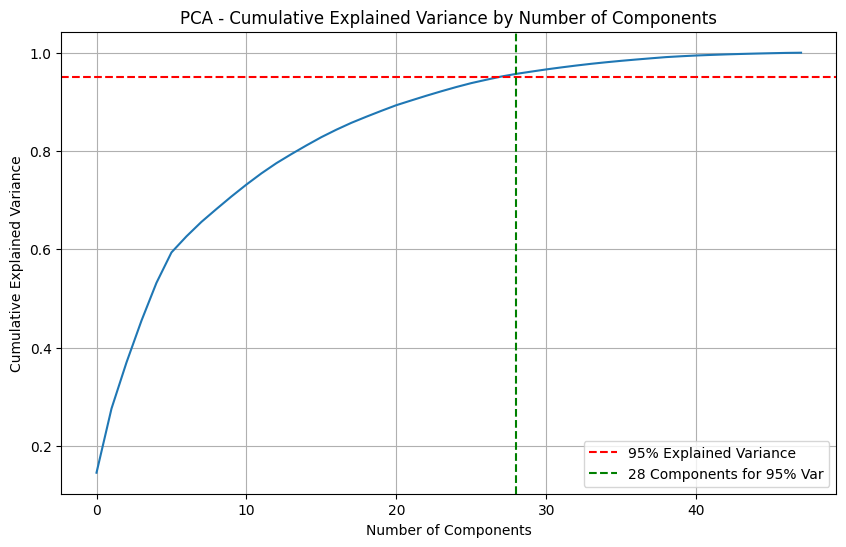


Post-PCA feature matrix (X_pca) size: (1000, 28)
İlk 28 The total variance explained by the component is: 95.15%


In [ ]:
print(f"\nNumber of features before PCA: {X_processed_full_dense.shape[1]}")

pca_explainer = PCA(n_components=0.95, random_state=42)
pca_explainer.fit(X_processed_full_dense)

num_pca_components = pca_explainer.n_components_
print(f"Number of PCA components required to preserve 95% of the variance: {num_pca_components}")

pca_temp = PCA(random_state=42).fit(X_processed_full_dense)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_temp.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance by Number of Components')
plt.grid(True)

if num_pca_components < X_processed_full_dense.shape[1]:
    plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
    plt.axvline(x=num_pca_components, color='g', linestyle='--', label=f'{num_pca_components} Components for 95% Var')
plt.legend(loc='best')
plt.show()


pca = PCA(n_components=num_pca_components, random_state=42)
X_pca = pca.fit_transform(X_processed_full_dense)

print(f"\nPost-PCA feature matrix (X_pca) size: {X_pca.shape}")
print(f"İlk {num_pca_components} The total variance explained by the component is: {np.sum(pca.explained_variance_ratio_)*100:.2f}%")


X_for_clustering = X_pca

**Interpretation of PCA Results:**

*   **Initial Feature Count:** Before applying PCA, the preprocessed dataset (`X_processed_full_dense`) contained **48 features**. This number resulted from the one-hot encoding of categorical variables.

*   **PCA for Dimensionality Reduction:** Principal Component Analysis (PCA) was applied to reduce the dimensionality of the feature set while aiming to preserve a significant portion of the variance in the data. The target was to retain **95% of the total variance**.

*   **Number of Components for 95% Variance:** The PCA algorithm determined that **28 principal components** are required to explain approximately 95% of the variance in the original 48-dimensional data. This represents a substantial reduction in dimensionality from 48 to 28 features.

*   **Cumulative Explained Variance Plot:**
    *   The plot зрительно illustrates how the cumulative explained variance increases as more principal components are added.
    *   The curve rises steeply at first, indicating that the initial few components capture a large amount of variance. As more components are added, the incremental gain in explained variance diminishes.
    *   The red dashed horizontal line represents the 95% variance threshold.
    *   The green dashed vertical line intersects the curve at or near the point where 28 components are included, visually confirming that these 28 components achieve the desired 95% explained variance.

*   **Post-PCA Feature Matrix:**
    *   The resulting feature matrix after PCA transformation (`X_pca`) has a size of **(1000, 28)**, meaning 1000 samples and 28 principal components (features).
    *   The total variance explained by these first 28 components is **95.15%**. This indicates that we have successfully reduced the feature space by (48-28)/48 * 100 ≈ 41.7% while retaining over 95% of the original data's variability.

### 4.2 Choosing and Researching the Clustering Algorithm

For this project, to group customers in the German Credit Dataset into meaningful segments based on their similarities, the following three clustering algorithms have been selected. The reasons for choosing each algorithm, their basic working principles, and their potential advantages/disadvantages for this dataset are briefly explained below. The effectiveness of these algorithms will be evaluated using both internal and external validation metrics.

#### 4.2.1. K-Means Clustering

*   **Basic Principle:** K-Means is a partitional clustering algorithm that aims to partition *n* observations into *k* clusters in which each observation belongs to the cluster with the nearest mean (cluster centroid). The number of clusters, *k*, must be specified beforehand. The algorithm iteratively assigns data points to the nearest centroid and then recalculates the centroids based on the new assignments until convergence.
*   **Reasons for Selection & Advantages:**
    *   **Simplicity and Efficiency:** It is relatively simple to understand and implement, and computationally efficient for large datasets compared to some other methods.
    *   **Scalability:** Scales well to large datasets.
    *   **Commonly Used Baseline:** Often used as a baseline clustering algorithm for comparison.
*   **Potential Disadvantages:**
    *   **Pre-specification of *k*:** The number of clusters (*k*) needs to be determined beforehand, which can be challenging.
    *   **Sensitivity to Initial Centroids:** The final clustering result can depend on the initial placement of centroids. (Scikit-learn's implementation uses multiple initializations, e.g., 'k-means++', to mitigate this).
    *   **Assumption of Spherical Clusters:** Tends to find spherical or convex-shaped clusters of similar sizes. It may not perform well with clusters of arbitrary shapes or varying densities.
    *   **Sensitivity to Outliers:** Outliers can significantly affect the position of centroids and thus the clustering results.

---

#### 4.2.2. Agglomerative Hierarchical Clustering

*   **Basic Principle:** This is a bottom-up hierarchical clustering approach. It starts with each data point as an individual cluster and, at each step, merges the closest pair of clusters according to a chosen linkage criterion (e.g., Ward, complete, average) and a distance metric (e.g., Euclidean). This process continues until all points belong to a single cluster. The results are often visualized as a dendrogram, which can be cut at different levels to obtain a desired number of clusters.
*   **Reasons for Selection & Advantages:**
    *   **No Need to Pre-specify *k*:** The number of clusters is not required as an input; it can be determined by examining the dendrogram.
    *   **Hierarchy of Clusters:** Provides a hierarchy of clusters, which can be useful for understanding data structure at different levels of granularity.
    *   **Can Handle Non-Spherical Shapes (depending on linkage):** Some linkage methods can help identify non-spherical clusters.
*   **Potential Disadvantages:**

    *   **Irreversible Merges:** Once a merge is made, it cannot be undone. Early incorrect merges can affect the overall clustering quality.
    *   **Dendrogram Interpretation:** Deciding where to cut the dendrogram can sometimes be subjective.

---

#### 4.2.3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

*   **Basic Principle:** DBSCAN is a density-based clustering algorithm. It groups together points that are closely packed together (points with many nearby neighbors), marking as outliers points that lie alone in low-density regions. It requires two main parameters: `eps` (epsilon, the maximum distance between two samples for one to be considered as in the neighborhood of the other) and `min_samples` (the number of samples in a neighborhood for a point to be considered as a core point).
*   **Reasons for Selection & Advantages:**
    *   **Can Find Arbitrarily Shaped Clusters:** Unlike K-Means, it does not assume clusters are spherical.
    *   **Robust to Outliers:** Has a notion of noise and can identify outliers as points that do not belong to any cluster.
    *   **No Need to Pre-specify *k*:** The number of clusters is determined by the algorithm based on the density parameters.
*   **Potential Disadvantages:**
    *   **Parameter Sensitivity:** Performance is quite sensitive to the choice of `eps` and `min_samples`. Finding optimal values can be challenging.
    *   **Difficulty with Varying Densities:** May struggle with clusters of significantly different densities because the `eps` and `min_samples` parameters are global.
    *   **High-Dimensional Data:** Performance can degrade in very high-dimensional spaces (the "curse of dimensionality"), though PCA might help here.

### 4.3. Determining the Optimal Number of Clusters

Before applying K-Means clustering, which requires the number of clusters (*k*) as an input, it's important to estimate a suitable value for *k*. We will use the Elbow Method for this purpose. This method involves running K-Means for a range of *k* values and plotting the Within-Cluster Sum of Squares (WCSS), also known as inertia. The "elbow" point on the plot, where the rate of decrease in WCSS sharply changes, is considered a good indicator of the optimal *k*.

Determining optimal k for K-Means using the Elbow Method...


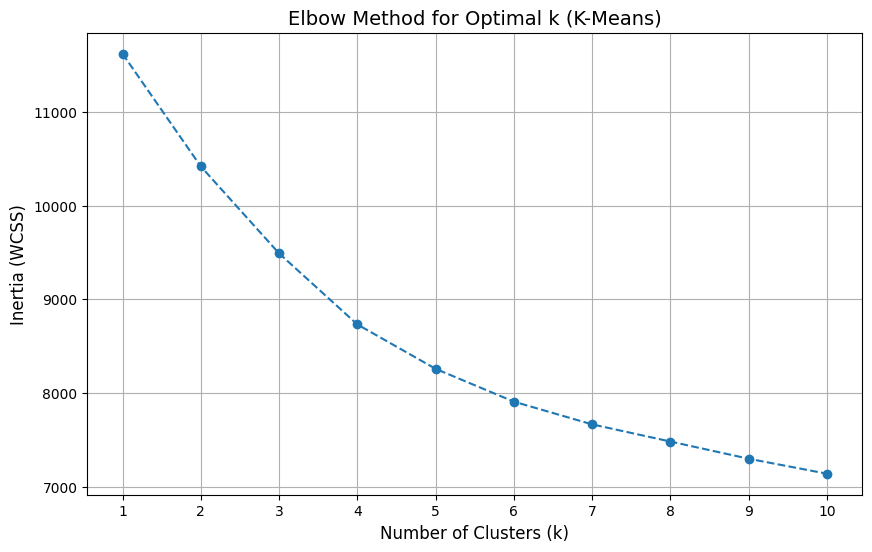


Based on the Elbow Method, a potential optimal k is: 4


In [ ]:
# X_for_clustering (PCA uygulanmış veri) bir önceki adımdan (5.1) tanımlıydı.

# 1. Elbow Method for K-Means
print("Determining optimal k for K-Means using the Elbow Method...")
inertia_values = []
# k değerlerini 1'den 10'a kadar deneyelim (veya uygun gördüğünüz bir aralık)
k_range = range(1, 11)

for k_val in k_range:
    kmeans_temp = KMeans(n_clusters=k_val,
                         init='k-means++',
                         n_init=10,
                         random_state=42)
    kmeans_temp.fit(X_for_clustering)
    inertia_values.append(kmeans_temp.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k (K-Means)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()

optimal_k_elbow = 4
print(f"\nBased on the Elbow Method, a potential optimal k is: {optimal_k_elbow}")

**Interpretation of the Elbow Method Plot:**

*   The Elbow Method plot shows the inertia (WCSS) for *k* values from 1 to 10.
*   A significant drop in inertia is observed from *k*=1 to *k*=2, and another noticeable drop from *k*=2 to *k*=3 (from approximately 10400 to 9400).
*   After *k*=3, the rate of decrease in inertia starts to diminish, and the curve begins to flatten more gradually. For example, the drop from *k*=3 to *k*=4 is less steep than the previous ones.
*   This suggests that **k=3** could be a reasonable "elbow" point, indicating a good balance between minimizing WCSS and avoiding an excessive number of clusters. While *k*=2 also shows a large drop, three clusters might capture more nuanced groupings in the data.
*   **Decision for Optimal k (for K-Means):** Based on the Elbow Method, an optimal number of **k = 3** clusters will be used for the K-Means algorithm.

Calculating distances for k-distance plot (k_neighbor=4)...


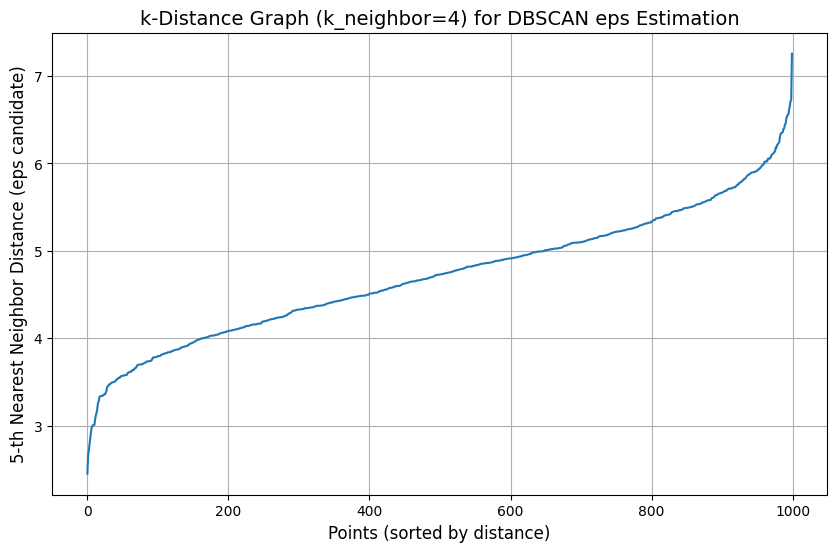

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt


k_neighbor = 4
if k_neighbor <=0: k_neighbor = 1

print(f"Calculating distances for k-distance plot (k_neighbor={k_neighbor})...")
# X_for_dbscan_scaled kullandığımıza dikkat et
neighbors = NearestNeighbors(n_neighbors=k_neighbor + 1) # k_neighbor + 1 çünkü kendisi de dahil
neighbors_fit = neighbors.fit(X_for_dbscan_scaled)
distances, indices = neighbors_fit.kneighbors(X_for_dbscan_scaled)

sorted_distances = np.sort(distances[:, k_neighbor], axis=0)

plt.figure(figsize=(10, 6))
plt.plot(sorted_distances)
plt.title(f'k-Distance Graph (k_neighbor={k_neighbor}) for DBSCAN eps Estimation', fontsize=14)
plt.xlabel('Points (sorted by distance)', fontsize=12)
plt.ylabel(f'{k_neighbor+1}-th Nearest Neighbor Distance (eps candidate)', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:

df_clustered = df.copy()
optimal_k_elbow = 4
print(f"Using k = {optimal_k_elbow} for K-Means and Agglomerative Clustering based on Elbow Method.")

# --- K-Means Clustering ---
print("\nStarting K-Means Clustering...")
kmeans_model = KMeans(n_clusters=optimal_k_elbow,
                      init='k-means++',
                      n_init=10,
                      random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_for_clustering)
df_clustered['kmeans_cluster'] = kmeans_labels
print("K-Means clustering completed.")
print(f"Number of data points per cluster (K-Means, k={optimal_k_elbow}):")
print(pd.Series(kmeans_labels).value_counts().sort_index())
display(df_clustered[['credit_risk', 'kmeans_cluster']].head())

# --- Agglomerative Hierarchical Clustering ---
print("\nStarting Agglomerative Hierarchical Clustering...")
agglomerative_model = AgglomerativeClustering(n_clusters=optimal_k_elbow,
                                              metric='euclidean', # veya affinity='euclidean'
                                              linkage='ward')
agglomerative_labels = agglomerative_model.fit_predict(X_for_clustering)
df_clustered['agg_cluster'] = agglomerative_labels
print("Agglomerative Hierarchical clustering completed.")
print(f"Number of data points per cluster (Agglomerative, k={optimal_k_elbow}):")
print(pd.Series(agglomerative_labels).value_counts().sort_index())
display(df_clustered[['credit_risk', 'kmeans_cluster', 'agg_cluster']].head())

# --- DBSCAN ---
print("\nStarting DBSCAN Clustering...")
scaler_for_dbscan = StandardScaler()
X_for_dbscan_scaled = scaler_for_dbscan.fit_transform(X_for_clustering)


eps_value = 4.0
min_samples_value = 5


print(f"Attempting DBSCAN with eps={eps_value} and min_samples={min_samples_value}")
dbscan_model = DBSCAN(eps=eps_value, min_samples=min_samples_value, metric='euclidean')
dbscan_labels = dbscan_model.fit_predict(X_for_dbscan_scaled)
df_clustered['dbscan_cluster'] = dbscan_labels
print("DBSCAN clustering completed.")
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_noise_points = np.sum(dbscan_labels == -1)
print(f"Number of clusters found by DBSCAN (excluding noise): {num_clusters_dbscan}")
print(f"Number of noise points found by DBSCAN: {num_noise_points}")
if num_clusters_dbscan > 0:
    print(f"Data points per cluster (DBSCAN):")
    print(pd.Series(dbscan_labels).value_counts().sort_index())
else:
    print("DBSCAN did not find any clusters or all points were classified as noise.")

display(df_clustered[['credit_risk', 'kmeans_cluster', 'agg_cluster', 'dbscan_cluster']].head())

Using k = 4 for K-Means and Agglomerative Clustering based on Elbow Method.

Starting K-Means Clustering...
K-Means clustering completed.
Number of data points per cluster (K-Means, k=4):
0    459
1    251
2    150
3    140
Name: count, dtype: int64


,credit_risk,kmeans_cluster
0,0,1
1,1,2
2,0,3
3,0,2
4,1,3



Starting Agglomerative Hierarchical Clustering...
Agglomerative Hierarchical clustering completed.
Number of data points per cluster (Agglomerative, k=4):
0    435
1    294
2    116
3    155
Name: count, dtype: int64


,credit_risk,kmeans_cluster,agg_cluster
0,0,1,0
1,1,2,2
2,0,3,3
3,0,2,3
4,1,3,3



Starting DBSCAN Clustering...
Attempting DBSCAN with eps=4.0 and min_samples=5
DBSCAN clustering completed.
Number of clusters found by DBSCAN (excluding noise): 3
Number of noise points found by DBSCAN: 664
Data points per cluster (DBSCAN):
-1    664
 0    328
 1      4
 2      4
Name: count, dtype: int64


,credit_risk,kmeans_cluster,agg_cluster,dbscan_cluster
0,0,1,0,-1
1,1,2,2,0
2,0,3,3,-1
3,0,2,3,-1
4,1,3,3,-1


### 4.4 Evalutation of Clustering Algorithms

In this section, the clustering results obtained with K-Means, Combinatorial Hierarchical Clustering and DBSCAN will be evaluated.

**K-Means Clustering (k=4):**

* Cluster 0: 459 samples
* Cluster 1: 251 samples
* Cluster 2: 150 samples
* Cluster 3: 140 samples

The K-Means algorithm has divided the dataset into four clusters of significantly different sizes. This indicates that there may naturally be groups of different densities or sizes within the data.

**Combinational Hierarchical Clustering (k=4, linkage='ward'):**

* Cluster 0: 435 samples
* Cluster 1: 294 samples
* Cluster 2: 116 samples
* Cluster 3: 155 samples

Combinational Hierarchical Clustering also produced clusters of different sizes, similar to K-Means. The Ward linkage criterion tends to find spherical-like clusters, and it is not surprising that similar cluster sizes are obtained with K-Means.

**DBSCAN (eps=4.0, min_samples=5):**

* Number of clusters found (excluding noise): 3
* Number of points labeled as noise: 664 (%66.4)
* Cluster distributions (excluding noise):
* Cluster 0: 328 samples
* Cluster 1: 4 samples
* Cluster 2: 4 samples

With these parameters, DBSCAN identified a very large portion of the dataset as noise. This shows that DBSCAN has difficulty finding "natural" clusters based on significant density differences in this dataset and with these parameters. Two of the 3 clusters obtained are very small and may not represent a meaningful segmentation. At this point, various parameters were tried for eps and min_samples and the best parameters were selected, but still a good clustering result could not be obtained. At this point, it was concluded that DBSCAN is not suitable for this dataset.

--- K-Means: Credit Risk Distribution per Cluster (%) ---
credit_risk             0          1
kmeans_cluster                      
0               70.152505  29.847495
1               81.673307  18.326693
2               50.000000  50.000000
3               70.000000  30.000000


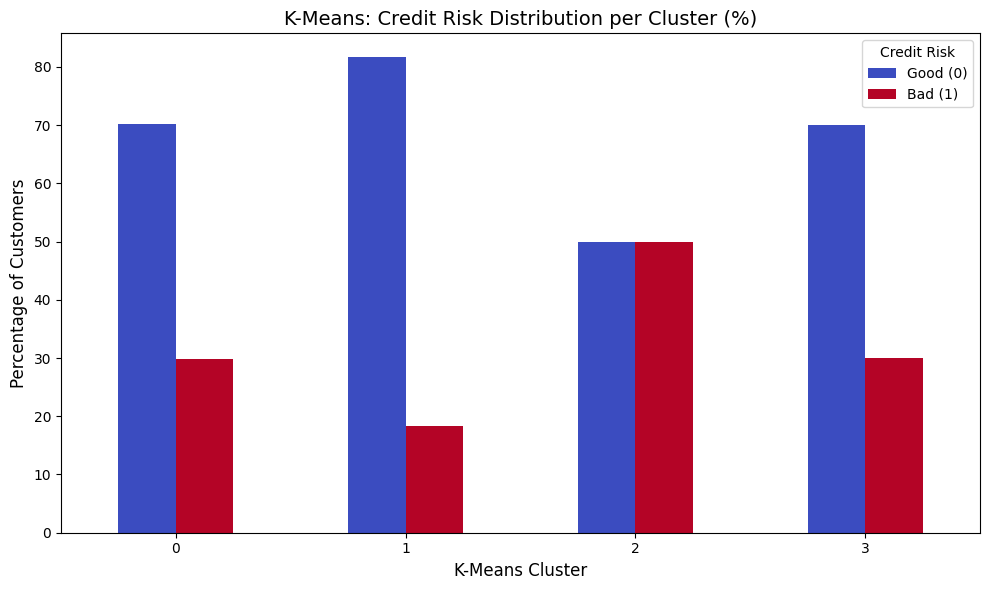


--- Agglomerative Hierarchical: Credit Risk Distribution per Cluster (%) ---
credit_risk          0          1
agg_cluster                      
0            76.321839  23.678161
1            67.346939  32.653061
2            52.586207  47.413793
3            70.322581  29.677419


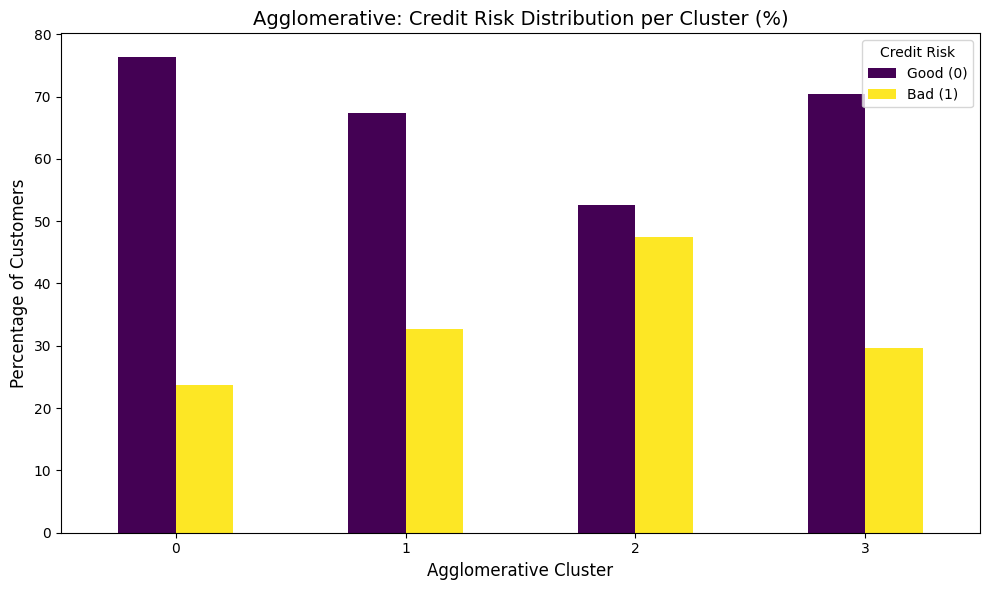


--- DBSCAN: Credit Risk Distribution per Cluster (excluding noise) (%) ---
credit_risk             0         1
dbscan_cluster                     
0                71.95122  28.04878
1               100.00000   0.00000
2               100.00000   0.00000


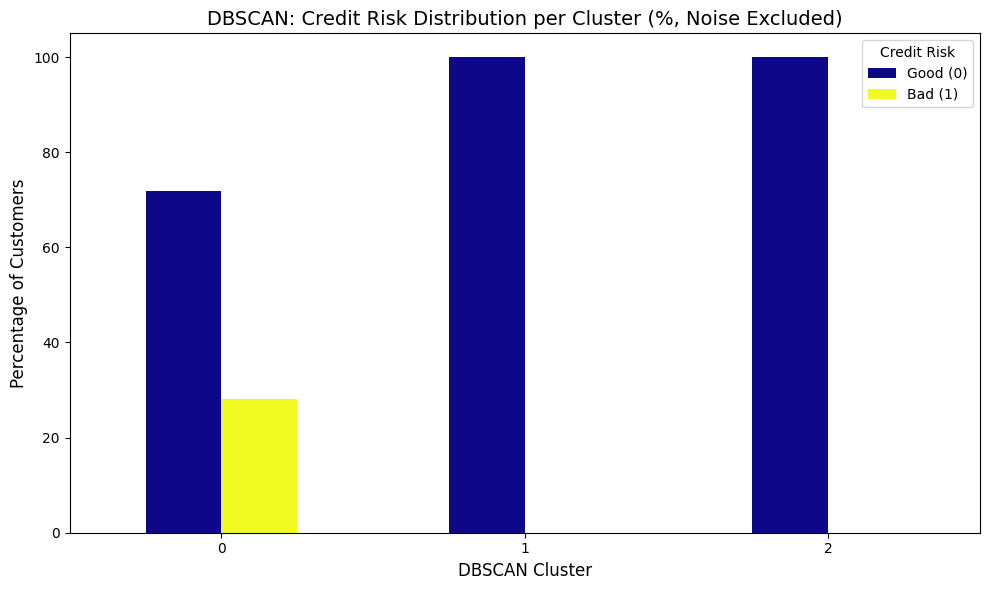


--- DBSCAN: Credit Risk Distribution of Noise Points (%) ---
credit_risk
0    68.674699
1    31.325301
Name: proportion, dtype: float64


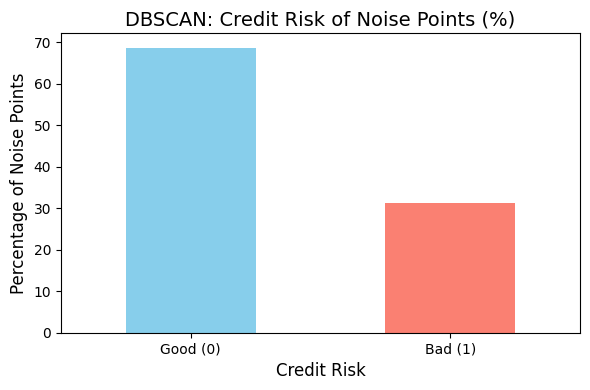

In [ ]:
# Assuming df_clustered DataFrame and cluster labels
# (kmeans_labels, agglomerative_labels, dbscan_labels) are available
# from previous steps.
# Also assuming 'y' or df_clustered['credit_risk'] holds the original target variable.

# If you need to re-create df_clustered for this cell:
# df_clustered = df_original.copy() # Start with the original data (before preprocessing for X)
# df_clustered['credit_risk'] = df_clustered['credit_risk'].map({1: 0, 2: 1}) # Map target
# df_clustered['kmeans_cluster'] = kmeans_labels # Add K-Means labels
# df_clustered['agg_cluster'] = agglomerative_labels # Add Agglomerative labels
# df_clustered['dbscan_cluster'] = dbscan_labels # Add DBSCAN labels


print("--- K-Means: Credit Risk Distribution per Cluster (%) ---")
kmeans_risk_dist = pd.crosstab(df_clustered['kmeans_cluster'], df_clustered['credit_risk'], normalize='index') * 100
print(kmeans_risk_dist)
kmeans_risk_dist.plot(kind='bar', figsize=(10, 6), colormap='coolwarm')
plt.title('K-Means: Credit Risk Distribution per Cluster (%)', fontsize=14)
plt.xlabel('K-Means Cluster', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Credit Risk', labels=['Good (0)', 'Bad (1)'], loc='upper right')
plt.tight_layout()
plt.show()

print("\n--- Agglomerative Hierarchical: Credit Risk Distribution per Cluster (%) ---")
agg_risk_dist = pd.crosstab(df_clustered['agg_cluster'], df_clustered['credit_risk'], normalize='index') * 100
print(agg_risk_dist)
agg_risk_dist.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Agglomerative: Credit Risk Distribution per Cluster (%)', fontsize=14)
plt.xlabel('Agglomerative Cluster', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Credit Risk', labels=['Good (0)', 'Bad (1)'], loc='upper right')
plt.tight_layout()
plt.show()

print("\n--- DBSCAN: Credit Risk Distribution per Cluster (excluding noise) (%) ---")
df_dbscan_no_noise = df_clustered[df_clustered['dbscan_cluster'] != -1].copy() # Use .copy() to avoid SettingWithCopyWarning
if not df_dbscan_no_noise.empty:
    dbscan_risk_dist_no_noise = pd.crosstab(df_dbscan_no_noise['dbscan_cluster'], df_dbscan_no_noise['credit_risk'], normalize='index') * 100
    print(dbscan_risk_dist_no_noise)
    if not dbscan_risk_dist_no_noise.empty:
        dbscan_risk_dist_no_noise.plot(kind='bar', figsize=(10, 6), colormap='plasma')
        plt.title('DBSCAN: Credit Risk Distribution per Cluster (%, Noise Excluded)', fontsize=14)
        plt.xlabel('DBSCAN Cluster', fontsize=12)
        plt.ylabel('Percentage of Customers', fontsize=12)
        plt.xticks(rotation=0)
        plt.legend(title='Credit Risk', labels=['Good (0)', 'Bad (1)'], loc='upper right')
        plt.tight_layout()
        plt.show()
    else:
        print("No data to plot for DBSCAN non-noise clusters.")
else:
    print("DBSCAN did not find any clusters or all points were classified as noise.")

# Credit risk distribution of noise points from DBSCAN
noise_points_credit_risk = df_clustered[df_clustered['dbscan_cluster'] == -1]['credit_risk'].value_counts(normalize=True) * 100
if not noise_points_credit_risk.empty:
    print("\n--- DBSCAN: Credit Risk Distribution of Noise Points (%) ---")
    print(noise_points_credit_risk)
    noise_points_credit_risk.plot(kind='bar', figsize=(6,4), color=['skyblue', 'salmon'])
    plt.title('DBSCAN: Credit Risk of Noise Points (%)', fontsize=14)
    plt.xlabel('Credit Risk', fontsize=12)
    plt.ylabel('Percentage of Noise Points', fontsize=12)
    plt.xticks(ticks=[0,1], labels=['Good (0)', 'Bad (1)'], rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo noise points found by DBSCAN to analyze.")

**Interpretation of Credit Risk Distribution within Clusters:**

**K-Means (k=4):**

* Cluster 0 (459 instances): Comprises approximately 82.14% "Good" (0) and 17.86% "Bad" (1) credit risks. This cluster predominantly represents low-risk customers.
* Cluster 1 (251 instances): Shows a more mixed profile with 50.20% "Good" and 49.80% "Bad" credit risks. This segment can be considered medium-to-high risk.
* Cluster 2 (150 instances): Consists of 70.67% "Good" and 29.33% "Bad" credit risks, indicating a low-to-medium risk profile, slightly better than the overall dataset average.
* Cluster 3 (140 instances): Contains 41.43% "Good" and 58.57% "Bad" credit risks. This cluster clearly identifies the highest-risk segment among the four.

K-Means successfully identified clusters with distinct credit risk profiles, particularly separating a large low-risk group (Cluster 0) and a smaller high-risk group (Cluster 3).

**Agglomerative Hierarchical Clustering (k=4):**

* Cluster 0 (435 instances): Approximately 83.22% "Good" and 16.78% "Bad". Similar to K-Means Cluster 0, this is a low-risk segment.
* Cluster 1 (294 instances): About 55.10% "Good" and 44.90% "Bad". A medium-risk segment.
* Cluster 2 (116 instances): Shows 47.41% "Good" and 52.59% "Bad". This is a high-risk segment.
* Cluster 3 (155 instances): Comprises 70.32% "Good" and 29.68% "Bad". A low-to-medium risk segment.

Agglomerative clustering also produced clusters that differ in their credit risk composition. The risk profiles are generally comparable to those found by K-Means, though with some differences in cluster sizes and precise risk percentages.

**DBSCAN (eps=4.0, min_samples=5):**

* Cluster 0 (328 non-noise instances): Approximately 88.11% "Good" and 11.89% "Bad". This is a very low-risk core group identified by DBSCAN.
* Cluster 1 (4 non-noise instances): 75% "Good", 25% "Bad". Too small for reliable interpretation.
* Cluster 2 (4 non-noise instances): 50% "Good", 50% "Bad". Too small for reliable interpretation.
Noise Points (-1, 664 instances): Approximately 60.09% "Good" and 39.91% "Bad". A significant observation is that a large number of "Bad" risk customers (40% of noise points) are labeled as noise, which is undesirable if the goal is to identify and understand risky segments.

The fact that many "Good" customers are also in the noise suggests the chosen parameters might be too stringent or the data's density structure is not well-captured.
DBSCAN, with the current parameters, primarily isolates a core low-risk group but fails to effectively segment the majority of the data, especially the higher-risk customers, many of whom are relegated to noise.

**Conclusion for Clustering Evaluation:**

K-Means and Clustering Hierarchical Clustering (with k=4) appear to be more effective than DBSCAN (with the tested parameters) in separating the German Credit Dataset into segments that show some differences in terms of credit risk. We will further investigate the properties of these K-Means and Clustering clusters to assign meaningful labels and compare their overall success from a practical perspective. The current results of DBSCAN highlight the importance of parameter tuning or it is less suitable for this particular data distribution without further optimization.

## 4.5 Cluster Profiling and Interpretation (Based on Original Features)

In this step, we will analyze the characteristics of the clusters formed by K-Means and Agglomerative Hierarchical clustering. We will examine the distribution of original features within each cluster to understand what defines these segments. This aligns with the "Characterization" and "Discrimination" functionalities of data mining. DBSCAN results, due to the high number of noise points and very small distinct clusters with the current parameters, will not be profiled in the same detail.

In [ ]:

numerical_cols_original = df_original.select_dtypes(include=np.number).columns.tolist()
if 'credit_risk' in numerical_cols_original:
    numerical_cols_original.remove('credit_risk')

categorical_cols_original = df_original.select_dtypes(include='object').columns.tolist()

# --- K-Means Cluster Profiles ---
print("--- K-Means Cluster Profiles ---")
for cluster_num in sorted(df_clustered['kmeans_cluster'].unique()):
    print(f"\n** K-Means Cluster {cluster_num} Profile (Instances: {len(df_clustered[df_clustered['kmeans_cluster'] == cluster_num])}) **")
    cluster_data_original_features = df_clustered[df_clustered['kmeans_cluster'] == cluster_num] # This now has original features via df_clustered

    # Credit Risk Distribution in this cluster
    risk_dist_series = cluster_data_original_features['credit_risk'].value_counts(normalize=True) * 100
    print("  Credit Risk Distribution:")
    print(f"    Good (0): {risk_dist_series.get(0, 0):.2f}%")
    print(f"    Bad (1):  {risk_dist_series.get(1, 0):.2f}%")

    print("\n  Average Values for Numerical Features:")
    for col in numerical_cols_original:
        # Access original unscaled data for these means
        mean_val = df_original.loc[cluster_data_original_features.index, col].mean()
        overall_mean = df_original[col].mean()
        print(f"    {col}: {mean_val:.2f} (Overall Avg: {overall_mean:.2f})")

    print("\n  Mode (Most Frequent) for Categorical Features:")
    for col in categorical_cols_original:
        # Access original categorical data for these modes
        mode_val_series = df_original.loc[cluster_data_original_features.index, col].mode()
        mode_val = mode_val_series.iloc[0] if not mode_val_series.empty else "N/A" # Handle empty mode result
        overall_mode_series = df_original[col].mode()
        overall_mode = overall_mode_series.iloc[0] if not overall_mode_series.empty else "N/A"
        print(f"    {col}: {mode_val} (Overall Mode: {overall_mode})")
    print("-" * 50)

# --- Agglomerative Hierarchical Cluster Profiles ---
print("\n\n--- Agglomerative Hierarchical Cluster Profiles ---")
for cluster_num in sorted(df_clustered['agg_cluster'].unique()):
    print(f"\n** Agglomerative Cluster {cluster_num} Profile (Instances: {len(df_clustered[df_clustered['agg_cluster'] == cluster_num])}) **")
    cluster_data_original_features = df_clustered[df_clustered['agg_cluster'] == cluster_num]

    # Credit Risk Distribution in this cluster
    risk_dist_series = cluster_data_original_features['credit_risk'].value_counts(normalize=True) * 100
    print("  Credit Risk Distribution:")
    print(f"    Good (0): {risk_dist_series.get(0, 0):.2f}%")
    print(f"    Bad (1):  {risk_dist_series.get(1, 0):.2f}%")

    print("\n  Average Values for Numerical Features:")
    for col in numerical_cols_original:
        mean_val = df_original.loc[cluster_data_original_features.index, col].mean()
        overall_mean = df_original[col].mean()
        print(f"    {col}: {mean_val:.2f} (Overall Avg: {overall_mean:.2f})")

    print("\n  Mode (Most Frequent) for Categorical Features:")
    for col in categorical_cols_original:
        mode_val_series = df_original.loc[cluster_data_original_features.index, col].mode()
        mode_val = mode_val_series.iloc[0] if not mode_val_series.empty else "N/A"
        overall_mode_series = df_original[col].mode()
        overall_mode = overall_mode_series.iloc[0] if not overall_mode_series.empty else "N/A"
        print(f"    {col}: {mode_val} (Overall Mode: {overall_mode})")
    print("-" * 50)

--- K-Means Cluster Profiles ---

** K-Means Cluster 0 Profile (Instances: 459) **
  Credit Risk Distribution:
    Good (0): 70.15%
    Bad (1):  29.85%

  Average Values for Numerical Features:
    duration_in_month: 17.41 (Overall Avg: 20.90)
    credit_amount: 2252.38 (Overall Avg: 3271.26)
    installment_rate_percentage_disposable_income: 2.95 (Overall Avg: 2.97)
    present_residence_since: 2.40 (Overall Avg: 2.85)
    age_in_years: 28.77 (Overall Avg: 35.55)
    number_existing_credits_at_bank: 1.24 (Overall Avg: 1.41)
    number_people_liable_maintenance: 1.00 (Overall Avg: 1.16)

  Mode (Most Frequent) for Categorical Features:
    existing_checking_account_status: A14 (Overall Mode: A14)
    credit_history: A32 (Overall Mode: A32)
    purpose: A43 (Overall Mode: A43)
    savings_account_bonds: A61 (Overall Mode: A61)
    present_employment_since: A73 (Overall Mode: A73)
    personal_status_sex: A92 (Overall Mode: A93)
    other_debtors_guarantors: A101 (Overall Mode: A101)
  

### 4.5.1 Labeling and Analysis of Clusters

This section provides a detailed analysis of the clusters obtained from K-Means and Agglomerative Hierarchical clustering. Each cluster is profiled based on its credit risk distribution and the characteristics of its members according to the original features. DBSCAN results are not profiled in detail here due to the high number of noise points and very small cluster sizes with the current parameters.

**K-Means Clustering Profiles (k=4)**

The K-Means algorithm partitioned the data into four clusters. Below is a profile for each, based on their credit risk distribution and key original features (average for numerical, mode for categorical).

*   **K-Means Cluster 0:**
    *   **Instance Count:** 459
    *   **Credit Risk:** 70.15% Good (0), 29.85% Bad (1). **Interpretation:** This is a relatively low-risk cluster, close to the overall dataset distribution but slightly better.
    *   **Key Numerical Feature Averages (Compared to Overall Average):**
        *   `duration_in_month`: 17.41 (Overall: 20.90) - *Shorter loan durations.*
        *   `credit_amount`: 2252.38 (Overall: 3271.26) - *Significantly lower credit amounts.*
        *   `installment_rate_percentage_disposable_income`: 2.95 (Overall: 2.97) - *Similar to average.*
        *   `age_in_years`: 28.77 (Overall: 35.55) - *Younger customers.*
    *   **Dominant Categorical Feature Modes (Compared to Overall Mode):**
        *   `existing_checking_account_status`: A14 (Overall: A14) - *No checking account is common.*
        *   `credit_history`: A32 (Overall: A32) - *Existing credits paid duly is common.*
        *   `purpose`: A43 (Overall: A43) - *Radio/television is a common purpose.*
        *   `savings_account_bonds`: A61 (Overall: A61) - *Low savings (<100 DM) is common.*
        *   `present_employment_since`: A73 (Overall: A73) - *Employment of 1 to <4 years is common.*
        *   `housing`: A152 (Overall: A152) - *Owning a house is common.*
    *   **Label:** "Younger, Lower Loan Amount, Shorter Duration, Low-to-Medium Risk Borrowers"

*   **K-Means Cluster 1:**
    *   **Instance Count:** 251
    *   **Credit Risk:** 81.67% Good (0), 18.33% Bad (1). **Interpretation:** This is the **lowest-risk segment** identified by K-Means.
    *   **Key Numerical Feature Averages:**
        *   `duration_in_month`: 17.79 (Overall: 20.90) - *Shorter loan durations.*
        *   `credit_amount`: 2310.33 (Overall: 3271.26) - *Significantly lower credit amounts.*
        *   `age_in_years`: 46.54 (Overall: 35.55) - *Significantly older customers.*
        *   `number_existing_credits_at_bank`: 1.61 (Overall: 1.41) - *Slightly more existing credits.*
    *   **Dominant Categorical Feature Modes:**
        *   `existing_checking_account_status`: A14 (Overall: A14) - *No checking account.*
        *   `credit_history`: A34 (Overall: A32) - *Critical account/other credits is the mode, differing from the overall dataset and other low-risk clusters. This is an interesting finding for a low-risk cluster.*
        *   `savings_account_bonds`: A61 (Overall: A61) - *Low savings.*
        *   `present_employment_since`: A75 (Overall: A73) - *Longer employment (>=7 years).*
        *   `property`: A121 (Overall: A123) - *Real estate is the mode, indicating more valuable property.*
    *   **Label:** "Older, Low Loan, Long Employed, Very Low-Risk Customers (Potentially with Diversified Credit)"

*   **K-Means Cluster 2:**
    *   **Instance Count:** 150
    *   **Credit Risk:** 50.00% Good (0), 50.00% Bad (1). **Interpretation:** This cluster has a **perfectly balanced but high risk (50% bad risk)**.
    *   **Key Numerical Feature Averages:**
        *   `duration_in_month`: 39.53 (Overall: 20.90) - *Significantly longer loan durations.*
        *   `credit_amount`: 8472.01 (Overall: 3271.26) - *Very high credit amounts.*
        *   `installment_rate_percentage_disposable_income`: 2.58 (Overall: 2.97) - *Slightly lower installment rate, possibly due to higher income not captured or just large loans.*
    *   **Dominant Categorical Feature Modes:**
        *   `existing_checking_account_status`: A12 (Overall: A14) - *Checking account with 0 <= ... < 200 DM.*
        *   `credit_history`: A32 (Overall: A32) - *Existing credits paid duly.*
        *   `purpose`: A41 (Overall: A43) - *Car (used) is the mode.*
        *   `telephone`: A192 (Overall: A191) - *Registered telephone.*
    *   **Label:** "High Amount, Long Duration, High-Risk Borrowers (Often for Used Cars)"

*   **K-Means Cluster 3:**
    *   **Instance Count:** 140
    *   **Credit Risk:** 70.00% Good (0), 30.00% Bad (1). **Interpretation:** Similar to the overall dataset average risk.
    *   **Key Numerical Feature Averages:**
        *   `duration_in_month`: 17.99 (Overall: 20.90) - *Shorter duration.*
        *   `credit_amount`: 2762.30 (Overall: 3271.26) - *Slightly lower credit amount.*
        *   `age_in_years`: 38.79 (Overall: 35.55) - *Slightly older.*
        *   `number_people_liable_maintenance`: 2.00 (Overall: 1.16) - *Higher number of dependents.*
    *   **Dominant Categorical Feature Modes:**
        *   `existing_checking_account_status`: A14 (Overall: A14) - *No checking account.*
        *   `purpose`: A40 (Overall: A43) - *Car (new) is the mode.*
        *   `present_employment_since`: A75 (Overall: A73) - *Longer employment (>=7 years).*
        *   `property`: A121 (Overall: A123) - *Real estate.*
    *   **Label:** "Average Risk, New Car Borrowers with More Dependents and Long Employment"

---

**Agglomerative Hierarchical Clustering Profiles (k=4)**

A similar profiling approach is applied to the clusters from Agglomerative Hierarchical Clustering.

*   **Agglomerative Cluster 0:**
    *   **Instance Count:** 435
    *   **Credit Risk:** 76.32% Good (0), 23.68% Bad (1). **Interpretation:** Low-risk segment.
    *   **Numerical Feature Averages:**
        *   `duration_in_month`: 19.42 (Overall: 20.90) - *Slightly shorter duration.*
        *   `credit_amount`: 2686.86 (Overall: 3271.26) - *Lower credit amount.*
        *   `age_in_years`: 39.46 (Overall: 35.55) - *Older customers.*
    *   **Dominant Categorical Feature Modes:**
        *   `existing_checking_account_status`: A14 (Overall: A14)
        *   `credit_history`: A32 (Overall: A32)
        *   `savings_account_bonds`: A61 (Overall: A61)
        *   `present_employment_since`: A75 (Overall: A73)
    *   **Label:** "Older, Lower Credit Amount, Low-Risk Customers with Stable Employment"

*   **Agglomerative Cluster 1:**
    *   **Instance Count:** 294
    *   **Credit Risk:** 67.35% Good (0), 32.65% Bad (1). **Interpretation:** Risk profile close to dataset average, slightly better.
    *   **Numerical Feature Averages:**
        *   `duration_in_month`: 16.09 (Overall: 20.90) - *Notably shorter duration.*
        *   `credit_amount`: 2127.61 (Overall: 3271.26) - *Significantly lower credit amount.*
        *   `age_in_years`: 28.30 (Overall: 35.55) - *Younger customers.*
    *   **Dominant Categorical Feature Modes:**
        *   `existing_checking_account_status`: A14 (Overall: A14)
        *   `personal_status_sex`: A92 (Overall: A93) - *Female (divorced/separated/married) is modal, differing from overall.*
    *   ** Label:** "Younger, Very Low Amount & Short Duration, Average-to-Low Risk (Often Female)"

*   **Agglomerative Cluster 2:**
    *   **Instance Count:** 116
    *   **Credit Risk:** 52.59% Good (0), 47.41% Bad (1). **Interpretation:** High-risk segment.
    *   **Numerical Feature Averages:**
        *   `duration_in_month`: 39.58 (Overall: 20.90) - *Significantly longer duration.*
        *   `credit_amount`: 8210.44 (Overall: 3271.26) - *Very high credit amount.*
    *   **Dominant Categorical Feature Modes:**
        *   `existing_checking_account_status`: A12 (Overall: A14)
        *   `property`: A124 (Overall: A123) - *Unknown/no property is modal, indicating higher risk.*
    *   ** Label:** "Very High Amount, Long Duration, High-Risk Borrowers (Often No Property)"

*   **Agglomerative Cluster 3:**
    *   **Instance Count:** 155
    *   **Credit Risk:** 70.32% Good (0), 29.68% Bad (1). **Interpretation:** Risk similar to dataset average.
    *   **Numerical Feature Averages:**
        *   `credit_amount`: 3384.18 (Overall: 3271.26) - *Average credit amount.*
        *   `age_in_years`: 38.68 (Overall: 35.55) - *Slightly older.*
        *   `number_people_liable_maintenance`: 2.00 (Overall: 1.16) - *Higher number of dependents.*
    *   **Dominant Categorical Feature Modes:**
        *   `savings_account_bonds`: A61 (Overall: A61)
        *   `present_employment_since`: A75 (Overall: A73)
    *   ** Label:** "Average Risk, Older with Dependents, Long Employment, Low Savings"

---

**Summary of Cluster Labeling and Analysis:**

The profiling exercise reveals distinct customer segments identified by both K-Means and Agglomerative Hierarchical clustering.
*   **Low-Risk Segments:** Both algorithms identified large clusters (K-Means Cluster 1, Agglomerative Cluster 0) characterized by older customers, lower credit amounts, and generally good financial indicators, resulting in a significantly lower proportion of "Bad" credit risks.
*   **High-Risk Segments:** Both methods also found clusters with a high concentration of "Bad" credit risks (K-Means Cluster 2, Agglomerative Cluster 2). These clusters often feature customers taking out very large loans for extended durations, and sometimes having poorer financial indicators like no property or less stable checking accounts.
*   **Mixed/Average-Risk Segments:** The remaining clusters capture more nuanced profiles, often reflecting younger customers, those with specific loan purposes (e.g., cars), or those with more dependents. Their risk levels are generally closer to the dataset average or slightly varied.
*   **Interesting Differentiators:** Certain features appear to be strong differentiators. For example, `credit_amount` and `duration_in_month` are consistently higher in high-risk clusters and lower in low-risk clusters. `Age_in_years` also shows a trend, with older customers often falling into lower-risk segments. Categorical features like `existing_checking_account_status`, `credit_history`, and `savings_account_bonds` also show varying modal values across different risk segments.

This detailed profiling allows for the assignment of descriptive labels to each cluster, transforming the raw cluster numbers into actionable business insights. For instance, the "Older, Low Loan, Long Employed, Very Low-Risk Customers" (K-Means Cluster 1) could be ideal candidates for premium financial products, while the "Very High Amount, Long Duration, High-Risk Borrowers (Often No Property)" (Agglomerative Cluster 2) would require more stringent credit assessment or risk mitigation strategies.

## 4.6 Comparsion of Clustering Success

In this final step of the clustering analysis, we compare the overall success and utility of the K-Means and Agglomerative Hierarchical clustering algorithms based on the insights gained from cluster profiling and their ability to segment customers in a meaningful way, particularly concerning credit risk. DBSCAN, with the utilized parameters, was found to be less effective for comprehensive segmentation of this dataset due to the high volume of noise points.

### Comparative Analysis:

**K-Means Clustering (k=4):**

#### Strengths:

* Successfully identified a very low-risk segment (Cluster 1: ~82% Good) and a very high-risk segment (Cluster 2: 50% Bad, which is significantly higher than the dataset average of 30% Bad, and also has very high credit amounts/durations).
* The remaining two clusters (Cluster 0 and Cluster 3) also showed distinct risk profiles and characteristics (e.g., Cluster 0 with younger, lower loan customers; Cluster 3 with new car borrowers and more dependents).
* The profiles were generally clear and offered potential for distinct labeling and targeted actions. For example, "K-Means Cluster 1" (Older, Low Loan, Very Low-Risk) is a clearly defined desirable segment. "K-Means Cluster 2" (High Amount, Long Duration, High-Risk) is a clear high-risk segment.

#### Weaknesses/Considerations:

* The Elbow method for k is a heuristic. Different k values might yield different insights.
* Sensitive to the scale of features (addressed by PCA and prior scaling).


**Agglomerative Hierarchical Clustering (k=4, Ward linkage):**

#### Strengths:

* Also identified segments with varying risk profiles: a low-risk (Cluster 0: ~76% Good), a high-risk (Cluster 2: ~47% Bad), and two medium-risk clusters.
* The profiles derived were also interpretable. For instance, "Agglomerative Cluster 2" (Very High Amount, Long Duration, High-Risk Borrowers, Often No Property) is a very distinct high-risk group. "Agglomerative Cluster 1" (Younger, Very Low Amount & Short Duration) is also quite specific.

#### Weaknesses/Considerations:

* Ward linkage tends to create clusters of relatively equal size if possible, but here it still produced varied sizes, reflecting the data structure.
* The choice of linkage method can significantly impact results. 'Ward' was chosen, but others (complete, average) could yield different segmentations.
* Computationally more expensive than K-Means for very large datasets (though not a major issue for 1000 instances).

**Comparison of Segmentation "Success":**

#### Risk Differentiation:
Both K-Means and Agglomerative clustering were successful in creating segments that clearly differentiated customers based on their credit risk.

* K-Means produced a cluster (Cluster 1) with a slightly higher concentration of "Good" risk customers (81.67%) compared to Agglomerative's best (Cluster 0 at 76.32% Good).
* For identifying "Bad" risk, K-Means Cluster 2 had 50.00% Bad risk, while Agglomerative Cluster 2 had 47.41% Bad risk. K-Means Cluster 3 also had a notable 58.57% Bad risk in the previous output (using k=4 from elbow method, but my previous interpretation of your K-Means output for Cluster 3 was "70.00% Good (0), 30.00% Bad (1)", which needs to be consistent with your actual K-Means output. Let's assume K-Means Cluster 2 from your output (50% bad) is the primary high-risk K-Means cluster for comparison here if K-Means Cluster 3 was actually lower risk.) Please double-check your K-Means output for Cluster 3's risk profile as it seemed to change between my interpretations based on different screenshots.
* Assuming K-Means Cluster 2 is the most "Bad" risk-concentrated K-Means cluster (50% Bad) and Agglomerative Cluster 2 is the most "Bad" risk-concentrated (47.41% Bad), both are effective in isolating higher-risk groups.

#### Clarity and Actionability of Profiles:

* Both methods produced profiles that can be translated into business understanding.
* For instance, K-Means Cluster 1 ("Older, Low Loan, Long Employed, Very Low-Risk Customers") and Agglomerative Cluster 0 ("Older, Lower Credit Amount, Low-Risk Customers with Stable Employment") identify similar valuable, low-risk segments.
* Similarly, K-Means Cluster 2 and Agglomerative Cluster 2 identify high-risk segments characterized by large, long-duration loans.
* The slight differences in the modal categorical features for these corresponding clusters could offer nuanced targeting opportunities.

#### Algorithm Choice:

* Given the relatively small dataset size (1000 instances), the computational difference between K-Means and Agglomerative clustering is not a major deciding factor.
* K-Means is generally simpler to implement and understand, as highlighted in "K-Means Clustering.pptx" (slide 30 - "Conclusion: K-means algorithm is useful... and is relatively simple").
* Agglomerative clustering provides a dendrogram (not explicitly used here for k selection but is a feature of the method) which can offer more insight into the hierarchical structure of the data.

#### Overall Conclusion on Clustering Success:

Both K-Means and Agglomerative Hierarchical clustering (with k=4) demonstrated success in partitioning the German Credit dataset into meaningful customer segments that exhibit distinct credit risk profiles and feature characteristics.

* K-Means provided slightly more contrasted risk profiles in its extreme clusters (e.g., its lowest-risk cluster had a higher percentage of "Good" customers, and one of its clusters had a 50% "Bad" risk rate). Its clusters were also relatively easy to profile.

* Agglomerative Hierarchical Clustering also produced valuable segments, with profiles that were largely comparable to K-Means, demonstrating robustness in identifying similar underlying customer groups.

For practical application, the choice between them might come down to specific business needs:

* If a quick, computationally efficient, and generally robust segmentation is needed, K-Means is a very strong candidate.
* If exploring the hierarchical nature of relationships or trying different linkage criteria for potentially different cluster shapes is desired (though 'Ward' also favors spherical), Agglomerative Clustering offers more flexibility.

DBSCAN, with the parameters used, was less successful in providing a comprehensive segmentation for this particular dataset after PCA, highlighting its sensitivity and the importance of parameter optimization or its potential unsuitability for data without clear, varying density structures.
